In [ ]:
!pip install torch torchvision
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import random
import cv2
import keras
import tensorflow as tf

from matplotlib.image import imread
from os import listdir
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras.utils import to_categorical
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
print(torch.__version__)
print(tf.__version__)

2.5.1+cu124
2.18.0


In [ ]:
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
else:
    print("Using CPU")

GPU is available!
GPU name: Tesla T4


## **Dataset Implementation**

In [ ]:
from google.colab import drive

# path to dataset in Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/Dataset'

classes = os.listdir(dataset_path)


num_classes = len(classes)


num_samples_per_class = {}
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    num_samples = len(os.listdir(class_dir))
    num_samples_per_class[class_name] = num_samples

# number of samples in the dataset
total_samples = sum(num_samples_per_class.values())

print(f"Number of classes: {num_classes}")
print(f"Total number of samples: {total_samples}")

Number of classes: 4
Total number of samples: 15492


In [ ]:
print("Class names:")
for class_name in classes:
    print(class_name)

Class names:
TUBERCULOSIS
PNEUMONIA
NORMAL
COVID


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


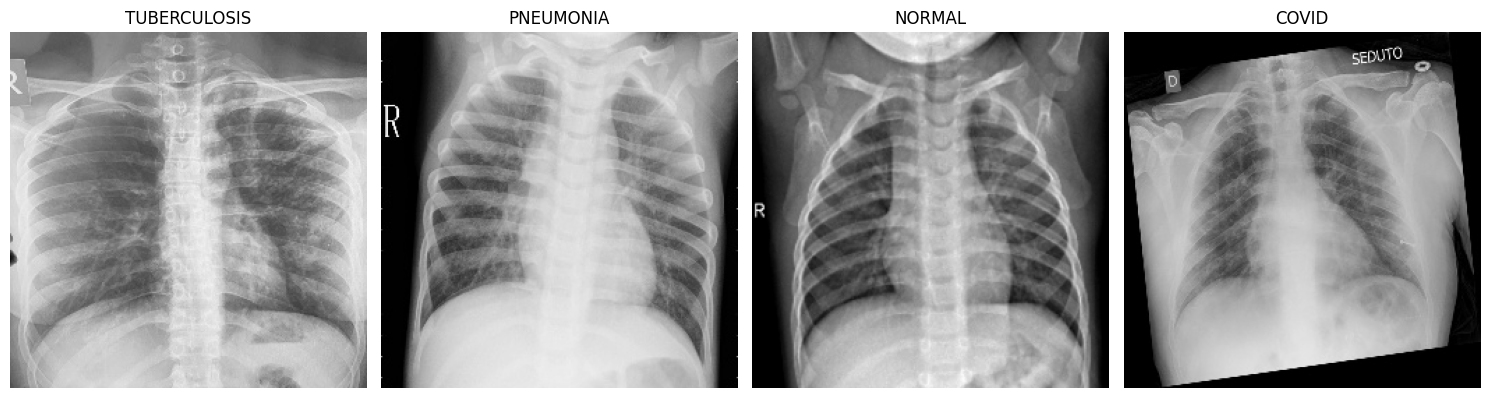

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Path to dataset in Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/Dataset'

# List classes
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Prepare a figure to display images
plt.figure(figsize=(15, 5))

# Loop through each class and show a random image
for i, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)
    # Get a list of all images in the class directory
    image_files = os.listdir(class_dir)

    # Select a random image
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_dir, random_image_file)

    # Open and display the image
    img = Image.open(random_image_path)

    # Plot the image
    plt.subplot(1, num_classes, i + 1)  # 1 row, num_classes columns
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')  # Hide axes ticks

# Show the plot
plt.tight_layout()
plt.show()

## **Dataset Visualization and Bar Graph**

In [ ]:
class_counts = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

img_per_class = pd.DataFrame(class_counts.values(), index=class_counts.keys(), columns=["no. of images"])
img_per_class = img_per_class.sort_values(by='no. of images', ascending=False)
img_per_class

no. of images
NORMAL                 4115
PNEUMONIA              4110
TUBERCULOSIS           4053
COVID                  3214

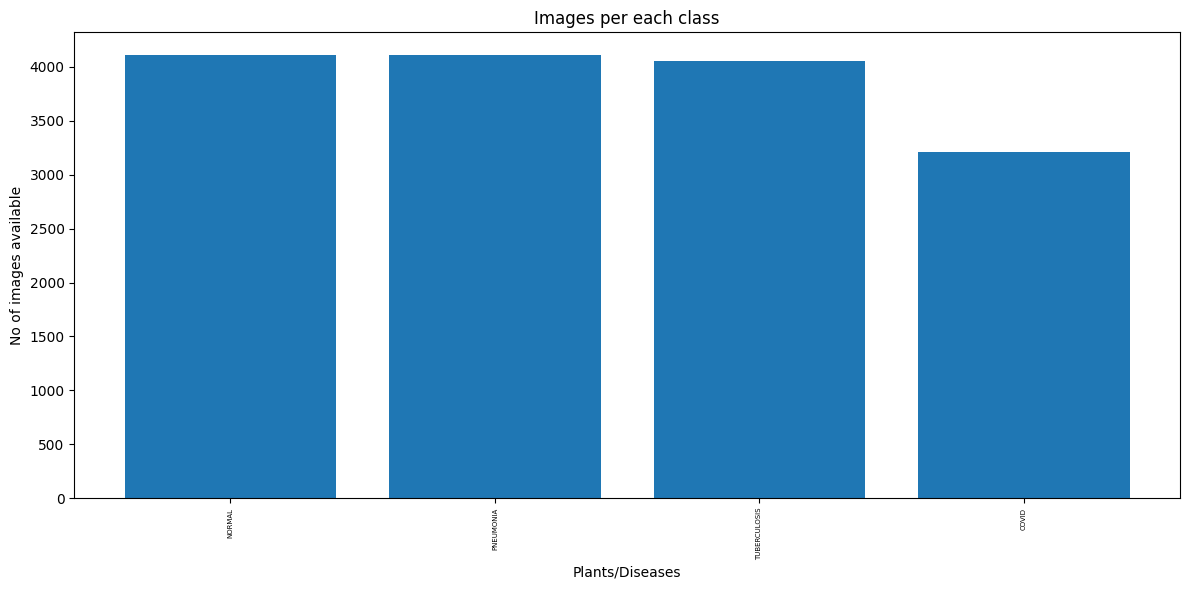

In [ ]:
img_per_class = img_per_class.sort_values(by='no. of images', ascending=False)

# Bar plot to visualize the number of images per class
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(img_per_class.index, img_per_class['no. of images'])
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(img_per_class.index, fontsize=5, rotation=90)
plt.title('Images per each class')
plt.tight_layout()
plt.show()

# **Dataset Visualization After Augmentation**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img

# Paths to your dataset directories
dataset_path = '/content/drive/MyDrive/Dataset/Dataset'  # Change this to your dataset path
class_folders = ['NORMAL', 'PNEUMONIA', 'TUBERCULOSIS', 'COVID']  # Class folder names

# Target count for each class
target_count = 5000

# Define the data augmentation generator with light augmentations
datagen = ImageDataGenerator(
    rotation_range=5,          # Slight rotation
    width_shift_range=0.02,    # Slight horizontal shift
    height_shift_range=0.02,   # Slight vertical shift
    brightness_range=[0.8, 1.2], # Slight brightness changes
    shear_range=0.02,          # Slight shearing
    zoom_range=0.02,           # Slight zooming
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest'        # Fill in missing pixels
)

# Function to augment images
def augment_class_images(class_name, current_count):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # Calculate the starting number for new images
    start_number = current_count + 1

    # Continue augmenting until the count reaches 5000
    while current_count < target_count:
        # Randomly choose an image from the existing dataset
        image_name = np.random.choice(images)
        image_path = os.path.join(class_path, image_name)

        # Load the image
        img = load_img(image_path)
        img_array = img_to_array(img)  # Convert image to array

        # Reshape for ImageDataGenerator (needs batch dimension)
        img_array = np.expand_dims(img_array, axis=0)

        # Generate a single augmented image
        aug_iter = datagen.flow(img_array, batch_size=1)
        aug_img_array = next(aug_iter)[0].astype('uint8')  # Get the next augmented image

        # Generate new image name (e.g., NORMAL (4116).jpg)
        new_image_name = f"{class_name} ({start_number}).jpg"
        new_image_path = os.path.join(class_path, new_image_name)

        # Save the new image
        aug_img = array_to_img(aug_img_array)
        save_img(new_image_path, aug_img)

        # Update the current image count and start number
        current_count += 1
        start_number += 1

# Loop through each class and augment its images
for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)

    # Count the number of existing images in the class folder
    current_image_count = len(os.listdir(class_path))

    # If the class has less than 5000 images, augment more
    if current_image_count < target_count:
        augment_class_images(class_name, current_image_count)

print("Image augmentation completed successfully!")

Image augmentation completed successfully!


In [ ]:
class_counts = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

img_per_class = pd.DataFrame(class_counts.values(), index=class_counts.keys(), columns=["no. of images"])
img_per_class = img_per_class.sort_values(by='no. of images', ascending=False)
img_per_class

no. of images
TUBERCULOSIS           5000
PNEUMONIA              5000
NORMAL                 5000
COVID                  5000

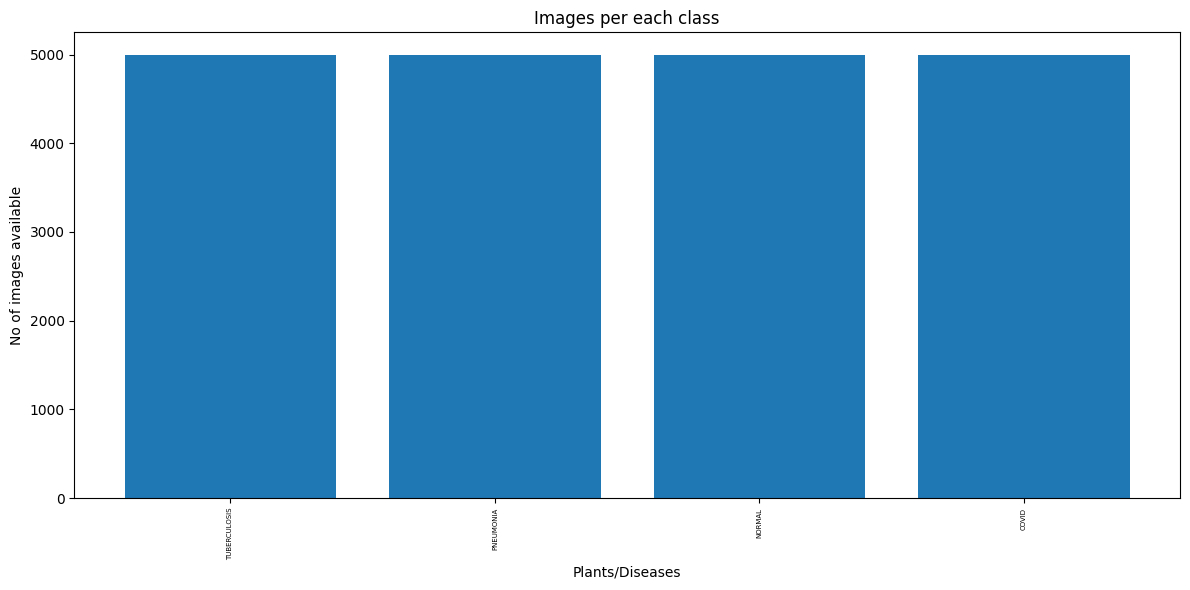

In [ ]:
img_per_class = img_per_class.sort_values(by='no. of images', ascending=False)

# Bar plot to visualize the number of images per class
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(img_per_class.index, img_per_class['no. of images'])
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(img_per_class.index, fontsize=5, rotation=90)
plt.title('Images per each class')
plt.tight_layout()
plt.show()

## **Train-Test Split**

In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

# Paths
subset_images_path = '/content/drive/MyDrive/Dataset/Dataset'
split_output_path = '/content/drive/MyDrive/Dataset/Original Dataset (Split)'

# Train, Test, Validation split ratio
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Ensure the split output directory exists
if not os.path.exists(split_output_path):
    os.makedirs(split_output_path)

# Function to split dataset and save to respective folders
def split_and_save_images():
    classes = os.listdir(subset_images_path)

    for class_name in classes:
        class_path = os.path.join(subset_images_path, class_name)
        images = os.listdir(class_path)

        # Split the dataset into train, test, and validation
        train_images, test_val_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
        val_images, test_images = train_test_split(test_val_images, test_size=test_ratio / (test_ratio + val_ratio), random_state=42)

        # Create corresponding class folders in train, val, and test directories
        for split_type, split_images in [('train', train_images), ('val', val_images), ('test', test_images)]:
            split_dir = os.path.join(split_output_path, split_type, class_name)
            os.makedirs(split_dir, exist_ok=True)

            for img_file in split_images:
                src_img_path = os.path.join(class_path, img_file)
                dst_img_path = os.path.join(split_dir, img_file)
                shutil.copy(src_img_path, dst_img_path)  # Copy images to the split folder

        print(f"Class {class_name}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test images saved.")

# Run the splitting function
split_and_save_images()

Class TUBERCULOSIS: 3499 train, 750 val, 751 test images saved.
Class PNEUMONIA: 3499 train, 750 val, 751 test images saved.
Class NORMAL: 3499 train, 750 val, 751 test images saved.
Class COVID: 3499 train, 750 val, 751 test images saved.


# **Threshold Based Segmentation Using UNet**

In [ ]:
import os
import random
import cv2
import shutil
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Paths
subset_images_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/images_subset'
split_output_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/images_subset_split'
train_folder = os.path.join(split_output_path, 'train')

# Perform threshold-based segmentation on the training images
def perform_segmentation_and_save(input_folder, output_folder):
    classes = os.listdir(input_folder)

    for class_name in classes:
        class_path = os.path.join(input_folder, class_name)
        output_class_path = os.path.join(output_folder, class_name)

        # Ensure output directories exist
        os.makedirs(output_class_path, exist_ok=True)

        images = os.listdir(class_path)

        for img_file in images:
            img_path = os.path.join(class_path, img_file)
            # Read the image
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Perform threshold-based segmentation (this can be updated with your previous segmentation)
            _, segmented = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

            # Save segmented image to the output folder
            cv2.imwrite(os.path.join(output_class_path, img_file), segmented)

    print(f"Segmentation applied and saved for all images in {input_folder}.")

# Apply segmentation to training images only
segmentation_output_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/masks_subset_1'
perform_segmentation_and_save(train_folder, segmentation_output_path)

Segmentation applied and saved for all images in /content/drive/MyDrive/Dataset/Subset Images for Segmentation/images_subset_split/train.


In [ ]:
# Verify the number of images in the subset
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']
for class_name in classes:
    subset_class_dir = os.path.join(segmentation_output_path, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 699 images
PNEUMONIA: 699 images
NORMAL: 699 images
COVID: 699 images


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
import os
import sys
from tqdm import tqdm  # Import tqdm for progress bar
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to match your directory structure
from unet import UNet

# Test if UNet can be instantiated correctly
try:
    test_model = UNet(n_channels=1, n_classes=1)  # Replace with your actual parameters
    print("UNet imported successfully. Model summary:")
    print(test_model)
except Exception as e:
    print("Error importing UNet:", e)

class SegmentedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        base_name = os.path.splitext(img_file)[0]
                        mask_files = [f for f in os.listdir(os.path.join(mask_dir, class_folder)) if base_name in f]

                        if mask_files:  # If any masks are found
                            for mask_file in mask_files:
                                mask_path = os.path.join(mask_dir, class_folder, mask_file)
                                self.images.append((img_path, mask_path))
        # Debugging statement
        print(f"Loaded {len(self.images)} image-mask pairs.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, mask_path = self.images[idx]

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations (Resize and ToTensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load Dataset
train_images_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/train'
train_masks_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/masks_subset_1'
train_dataset = SegmentedDataset(train_images_dir, train_masks_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize UNet model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1)
model.to(device)

# Loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Function to calculate metrics: accuracy, precision, recall, F1-score
def calculate_metrics(outputs, masks):
    # Apply sigmoid activation and thresholding
    predicted = (torch.sigmoid(outputs) > 0.5).byte()  # Get binary predictions
    masks = masks.byte()

    # Flatten tensors
    predicted = predicted.view(-1).cpu().numpy()
    masks = masks.view(-1).cpu().numpy()

    # Calculate metrics
    accuracy = (predicted == masks).sum() / masks.size
    precision = precision_score(masks, predicted, zero_division=1)
    recall = recall_score(masks, predicted, zero_division=1)
    f1 = f1_score(masks, predicted, zero_division=1)

    return accuracy, precision, recall, f1

# Training loop
epochs = 10
results = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    total_accuracy = 0.0
    total_precision = 0.0
    total_recall = 0.0
    total_f1 = 0.0

    # Create a progress bar with tqdm
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit='batch') as pbar:
        for images, masks in train_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            accuracy, precision, recall, f1 = calculate_metrics(outputs, masks)
            total_accuracy += accuracy
            total_precision += precision
            total_recall += recall
            total_f1 += f1

            # Update progress bar
            pbar.set_postfix(loss=running_loss / (pbar.n + 1),
                             accuracy=total_accuracy / (pbar.n + 1),
                             precision=total_precision / (pbar.n + 1),
                             recall=total_recall / (pbar.n + 1),
                             f1=total_f1 / (pbar.n + 1))
            pbar.update(1)

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = total_accuracy / len(train_loader)
    avg_precision = total_precision / len(train_loader)
    avg_recall = total_recall / len(train_loader)
    avg_f1 = total_f1 / len(train_loader)

    print(f"Epoch [{epoch + 1}/{epochs}], Avg Loss: {avg_loss:.4f}, Avg Accuracy: {avg_accuracy:.4f}, Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}, F1-Score: {avg_f1:.4f}")

    # Store results for each epoch
    results.append([epoch + 1, avg_loss, avg_accuracy, avg_precision, avg_recall, avg_f1])

# Save the model
model_save_path = '/content/drive/MyDrive/model/trained_unet_model_threshold_segmentation.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# Save training metrics to CSV
results_df = pd.DataFrame(results, columns=['Epoch', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
csv_save_path = '/content/drive/MyDrive/training_results_threshold_based_segmentation.csv'
results_df.to_csv(csv_save_path, index=False)
print(f"Training results saved to {csv_save_path}")

print("Training completed.")

UNet imported successfully. Model summary:
UNet(
  (in_conv): UNetConvBlock(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (Down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): UNetConvBlock(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

Epoch 1/10: 100%|██████████| 175/175 [34:56<00:00, 11.98s/batch, accuracy=0.894, f1=0.858, loss=0.208, precision=0.825, recall=0.896]


Epoch [1/10], Avg Loss: 0.2075, Avg Accuracy: 0.8945, Precision: 0.8252, Recall: 0.8961, F1-Score: 0.8580


Epoch 2/10: 100%|██████████| 175/175 [05:38<00:00,  1.93s/batch, accuracy=0.91, f1=0.879, loss=0.157, precision=0.841, recall=0.924]


Epoch [2/10], Avg Loss: 0.1570, Avg Accuracy: 0.9100, Precision: 0.8409, Recall: 0.9238, F1-Score: 0.8795


Epoch 3/10: 100%|██████████| 175/175 [05:37<00:00,  1.93s/batch, accuracy=0.914, f1=0.885, loss=0.147, precision=0.844, recall=0.932]


Epoch [3/10], Avg Loss: 0.1472, Avg Accuracy: 0.9137, Precision: 0.8440, Recall: 0.9316, F1-Score: 0.8846


Epoch 4/10: 100%|██████████| 175/175 [05:37<00:00,  1.93s/batch, accuracy=0.916, f1=0.887, loss=0.139, precision=0.845, recall=0.936]


Epoch [4/10], Avg Loss: 0.1393, Avg Accuracy: 0.9157, Precision: 0.8450, Recall: 0.9361, F1-Score: 0.8874


Epoch 5/10: 100%|██████████| 175/175 [05:35<00:00,  1.92s/batch, accuracy=0.919, f1=0.892, loss=0.13, precision=0.847, recall=0.943]


Epoch [5/10], Avg Loss: 0.1298, Avg Accuracy: 0.9189, Precision: 0.8475, Recall: 0.9432, F1-Score: 0.8921


Epoch 6/10: 100%|██████████| 175/175 [05:30<00:00,  1.89s/batch, accuracy=0.92, f1=0.894, loss=0.126, precision=0.849, recall=0.945]


Epoch [6/10], Avg Loss: 0.1262, Avg Accuracy: 0.9202, Precision: 0.8493, Recall: 0.9447, F1-Score: 0.8936


Epoch 7/10: 100%|██████████| 175/175 [05:35<00:00,  1.92s/batch, accuracy=0.922, f1=0.897, loss=0.119, precision=0.852, recall=0.948]


Epoch [7/10], Avg Loss: 0.1195, Avg Accuracy: 0.9224, Precision: 0.8519, Recall: 0.9482, F1-Score: 0.8967


Epoch 8/10: 100%|██████████| 175/175 [05:28<00:00,  1.88s/batch, accuracy=0.923, f1=0.897, loss=0.119, precision=0.851, recall=0.95]


Epoch [8/10], Avg Loss: 0.1189, Avg Accuracy: 0.9227, Precision: 0.8515, Recall: 0.9496, F1-Score: 0.8970


Epoch 9/10: 100%|██████████| 175/175 [05:29<00:00,  1.89s/batch, accuracy=0.923, f1=0.898, loss=0.117, precision=0.852, recall=0.951]


Epoch [9/10], Avg Loss: 0.1171, Avg Accuracy: 0.9234, Precision: 0.8524, Recall: 0.9507, F1-Score: 0.8981


Epoch 10/10: 100%|██████████| 175/175 [05:29<00:00,  1.88s/batch, accuracy=0.926, f1=0.901, loss=0.112, precision=0.856, recall=0.952]

Epoch [10/10], Avg Loss: 0.1118, Avg Accuracy: 0.9255, Precision: 0.8561, Recall: 0.9519, F1-Score: 0.9007
Model saved at /content/drive/MyDrive/Subset Images for Segmentation/trained_unet_model_threshold_segmentation.pth
Training results saved to /content/drive/MyDrive/Subset Images for Segmentation/training_results_threshold_based_segmentation.csv
Training completed.


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from tqdm import tqdm
from sklearn.metrics import jaccard_score  # For IoU
import sys
from torch.utils.data import Dataset, DataLoader
sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to match your directory structure
from unet import UNet

class SegmentedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        base_name = os.path.splitext(img_file)[0]
                        mask_files = [f for f in os.listdir(os.path.join(mask_dir, class_folder)) if base_name in f]

                        if mask_files:  # If any masks are found
                            for mask_file in mask_files:
                                mask_path = os.path.join(mask_dir, class_folder, mask_file)
                                self.images.append((img_path, mask_path))
        # Debugging statement
        print(f"Loaded {len(self.images)} image-mask pairs.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, mask_path = self.images[idx]

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations (Resize and ToTensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Define device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(n_channels=1, n_classes=1)
model.load_state_dict(torch.load('/content/drive/MyDrive/model/UNET_trained_model_threshold_segmentation.pth'))
model.to(device)  # Move model to the selected device
model.eval()  # Set the model to evaluation model

# Load test or validation dataset
test_images_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/train'  # Replace with the test image directory
test_masks_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/masks_subset_1'    # Replace with the test mask directory
test_dataset = SegmentedDataset(test_images_dir, test_masks_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Function to calculate IoU
def calculate_iou(predicted, masks):
    # Ensure binary masks: convert values > 0 to 1 for true binary mask comparison
    predicted = (predicted > 0).view(-1).cpu().numpy().astype(int)
    masks = (masks > 0).view(-1).cpu().numpy().astype(int)
    return jaccard_score(masks, predicted, average='binary')  # 'binary' for pixel-wise IoU

# Run inference and calculate IoU
total_iou = 0.0
num_batches = 0

with torch.no_grad():
    for images, masks in tqdm(test_loader, desc="Calculating IoU"):
        images = images.to(device)
        masks = masks.to(device)

        # Run model prediction
        outputs = model(images)

        # Apply threshold to get binary prediction mask
        predicted = (torch.sigmoid(outputs) > 0.5).byte()

        # Calculate IoU for the batch and accumulate
        batch_iou = calculate_iou(predicted, masks)
        total_iou += batch_iou
        num_batches += 1

# Compute average IoU
avg_iou = total_iou / num_batches
print(f"Average IoU score: {avg_iou:.4f}")

<ipython-input-12-4ec61ed6324b>:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/model/UNET_trained_model_threshold

Loaded 2796 image-mask pairs.


Calculating IoU: 100%|██████████| 175/175 [33:46<00:00, 11.58s/it]

Average IoU score: 0.8451


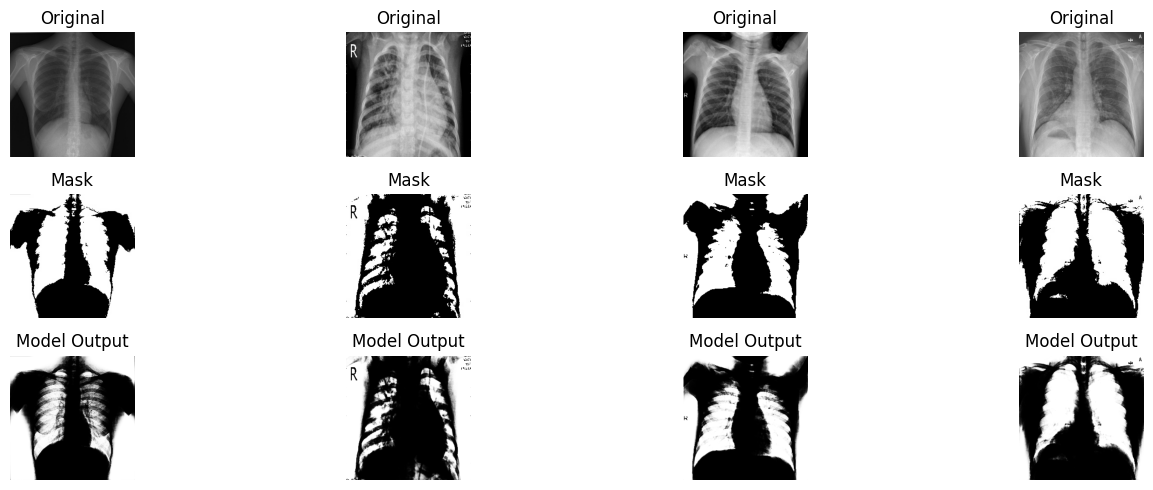

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to get a random image and its mask from each class
def get_random_image_paths(dataset):
    classes = os.listdir(train_images_dir)  # List of class folders
    random_images = []

    for class_name in classes:
        class_folder = os.path.join(train_images_dir, class_name)
        images = [f for f in os.listdir(class_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        if images:  # Check if there are images in the class folder
            random_image = random.choice(images)
            img_path = os.path.join(class_folder, random_image)
            mask_path = os.path.join(train_masks_dir, class_name, random_image)
            random_images.append((img_path, mask_path))

    return random_images

# Function to get the model's output for a specific image
def get_model_output(model, image_path, device):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))  # Resize to match model input size
    image_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)  # Add batch dimension and move to device
    with torch.no_grad():  # Disable gradient calculation
        output = model(image_tensor)
    output = torch.sigmoid(output).cpu().numpy()[0, 0]  # Apply sigmoid and remove batch dimension
    return output

# Function to visualize images
def visualize_images(original_images, masks, outputs):
    plt.figure(figsize=(15, 5))
    for i in range(len(original_images)):
        plt.subplot(3, len(original_images), i + 1)
        plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_GRAY2RGB))
        plt.title("Original")
        plt.axis('off')

        plt.subplot(3, len(original_images), i + 1 + len(original_images))
        plt.imshow(cv2.cvtColor(masks[i], cv2.COLOR_GRAY2RGB))
        plt.title("Mask")
        plt.axis('off')

        plt.subplot(3, len(original_images), i + 1 + 2 * len(original_images))
        plt.imshow(outputs[i], cmap='gray')
        plt.title("Model Output")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get random images and their corresponding masks
random_image_paths = get_random_image_paths(train_dataset)

# Prepare lists for visualization
original_images = []
masks = []
outputs = []

# Loop through the random images to load them and get model outputs
for img_path, mask_path in random_image_paths:
    original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    output = get_model_output(model, img_path, device)

    original_images.append(original_image)
    masks.append(mask)
    outputs.append(output)

# Visualize the images
visualize_images(original_images, masks, outputs)

# **Contour Based Segmentation Using UNet**

In [ ]:
# Install OpenCV and Pillow
!pip install opencv-python pillow

In [ ]:
import numpy as np
import os
import random
import cv2
from PIL import Image
import shutil
import matplotlib.pyplot as plt

In [ ]:
def segment_lungs_opencv(image_path, mask_path):
    """
    Segments the lungs in a chest X-ray image using OpenCV and saves the mask.

    Parameters:
    - image_path: Path to the input X-ray image.
    - mask_path: Path to save the generated mask.
    """
    try:
        # Load the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Failed to load image {image_path}")
            return

        # Enhance contrast using Histogram Equalization
        img_eq = cv2.equalizeHist(img)

        # Apply Gaussian Blur to reduce noise
        img_blur = cv2.GaussianBlur(img_eq, (5, 5), 0)

        # Apply Otsu's thresholding after Gaussian filtering
        _, thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Define a kernel for morphological operations
        kernel = np.ones((5, 5), np.uint8)

        # Perform morphological closing to fill gaps
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

        # Perform morphological opening to remove small objects
        opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)

        # Find contours
        contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create an empty mask
        mask = np.zeros_like(img)

        # Assume the two largest contours are the lungs
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

        for contour in contours:
            cv2.drawContours(mask, [contour], -1, 255, -1)  # Fill the contour

        # Save the mask
        cv2.imwrite(mask_path, mask)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

In [ ]:
subset_masks_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/train'
# Define class names
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Verify the number of images in the masks
for class_name in classes:
    subset_class_dir = os.path.join(subset_masks_path, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 699 images
PNEUMONIA: 699 images
NORMAL: 699 images
COVID: 699 images


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
import os
import sys
from tqdm import tqdm  # Import tqdm for progress bar
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to match your directory structure
from unet import UNet

# Test if UNet can be instantiated correctly
try:
    test_model = UNet(n_channels=1, n_classes=1)  # Replace with your actual parameters
    print("UNet imported successfully. Model summary:")
    print(test_model)
except Exception as e:
    print("Error importing UNet:", e)

class SegmentedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        base_name = os.path.splitext(img_file)[0]
                        mask_files = [f for f in os.listdir(os.path.join(mask_dir, class_folder)) if base_name in f]

                        if mask_files:  # If any masks are found
                            for mask_file in mask_files:
                                mask_path = os.path.join(mask_dir, class_folder, mask_file)
                                self.images.append((img_path, mask_path))
        # Debugging statement
        print(f"Loaded {len(self.images)} image-mask pairs.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, mask_path = self.images[idx]

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations (Resize and ToTensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load Dataset
train_images_dir = '/content/drive/MyDrive/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/train'
train_masks_dir = '/content/drive/MyDrive/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/train'
train_dataset = SegmentedDataset(train_images_dir, train_masks_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize UNet model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1)
model.to(device)

# Loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Function to calculate metrics: accuracy, precision, recall, F1-score
def calculate_metrics(outputs, masks):
    # Apply sigmoid activation and thresholding
    predicted = (torch.sigmoid(outputs) > 0.5).byte()  # Get binary predictions
    masks = masks.byte()

    # Flatten tensors
    predicted = predicted.view(-1).cpu().numpy()
    masks = masks.view(-1).cpu().numpy()

    # Calculate metrics
    accuracy = (predicted == masks).sum() / masks.size
    precision = precision_score(masks, predicted, zero_division=1)
    recall = recall_score(masks, predicted, zero_division=1)
    f1 = f1_score(masks, predicted, zero_division=1)

    return accuracy, precision, recall, f1

# Training loop
epochs = 10
results = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    total_accuracy = 0.0
    total_precision = 0.0
    total_recall = 0.0
    total_f1 = 0.0

    # Create a progress bar with tqdm
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit='batch') as pbar:
        for images, masks in train_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            accuracy, precision, recall, f1 = calculate_metrics(outputs, masks)
            total_accuracy += accuracy
            total_precision += precision
            total_recall += recall
            total_f1 += f1

            # Update progress bar
            pbar.set_postfix(loss=running_loss / (pbar.n + 1),
                             accuracy=total_accuracy / (pbar.n + 1),
                             precision=total_precision / (pbar.n + 1),
                             recall=total_recall / (pbar.n + 1),
                             f1=total_f1 / (pbar.n + 1))
            pbar.update(1)

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = total_accuracy / len(train_loader)
    avg_precision = total_precision / len(train_loader)
    avg_recall = total_recall / len(train_loader)
    avg_f1 = total_f1 / len(train_loader)

    print(f"Epoch [{epoch + 1}/{epochs}], Avg Loss: {avg_loss:.4f}, Avg Accuracy: {avg_accuracy:.4f}, Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}, F1-Score: {avg_f1:.4f}")

    # Store results for each epoch
    results.append([epoch + 1, avg_loss, avg_accuracy, avg_precision, avg_recall, avg_f1])

# Save the model
model_save_path = '/content/drive/MyDrive/Subset Images for Segmentation/trained_unet_model_contour_segmentation.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# Save training metrics to CSV
results_df = pd.DataFrame(results, columns=['Epoch', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
csv_save_path = '/content/drive/MyDrive/Subset Images for Segmentation/training_results_contour_based_segmentation.csv'
results_df.to_csv(csv_save_path, index=False)
print(f"Training results saved to {csv_save_path}")

print("Training completed.")

UNet imported successfully. Model summary:
UNet(
  (in_conv): UNetConvBlock(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (Down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): UNetConvBlock(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

Epoch 1/10: 100%|██████████| 175/175 [1:41:09<00:00, 34.68s/batch, accuracy=0.873, f1=0.879, loss=0.299, precision=0.873, recall=0.887]


Epoch [1/10], Avg Loss: 0.2991, Avg Accuracy: 0.8734, Precision: 0.8733, Recall: 0.8867, F1-Score: 0.8794


Epoch 2/10: 100%|██████████| 175/175 [05:21<00:00,  1.84s/batch, accuracy=0.905, f1=0.908, loss=0.237, precision=0.906, recall=0.912]


Epoch [2/10], Avg Loss: 0.2366, Avg Accuracy: 0.9045, Precision: 0.9059, Recall: 0.9116, F1-Score: 0.9085


Epoch 3/10: 100%|██████████| 175/175 [05:23<00:00,  1.85s/batch, accuracy=0.913, f1=0.917, loss=0.218, precision=0.913, recall=0.92]


Epoch [3/10], Avg Loss: 0.2181, Avg Accuracy: 0.9130, Precision: 0.9133, Recall: 0.9203, F1-Score: 0.9166


Epoch 4/10: 100%|██████████| 175/175 [05:25<00:00,  1.86s/batch, accuracy=0.918, f1=0.921, loss=0.208, precision=0.918, recall=0.925]


Epoch [4/10], Avg Loss: 0.2078, Avg Accuracy: 0.9176, Precision: 0.9180, Recall: 0.9245, F1-Score: 0.9210


Epoch 5/10: 100%|██████████| 175/175 [05:23<00:00,  1.85s/batch, accuracy=0.921, f1=0.925, loss=0.2, precision=0.921, recall=0.929]


Epoch [5/10], Avg Loss: 0.1996, Avg Accuracy: 0.9214, Precision: 0.9205, Recall: 0.9293, F1-Score: 0.9247


Epoch 6/10: 100%|██████████| 175/175 [05:23<00:00,  1.85s/batch, accuracy=0.922, f1=0.925, loss=0.196, precision=0.921, recall=0.93]


Epoch [6/10], Avg Loss: 0.1963, Avg Accuracy: 0.9218, Precision: 0.9208, Recall: 0.9301, F1-Score: 0.9252


Epoch 7/10: 100%|██████████| 175/175 [05:23<00:00,  1.85s/batch, accuracy=0.925, f1=0.928, loss=0.19, precision=0.924, recall=0.932]


Epoch [7/10], Avg Loss: 0.1902, Avg Accuracy: 0.9246, Precision: 0.9244, Recall: 0.9315, F1-Score: 0.9277


Epoch 8/10: 100%|██████████| 175/175 [05:22<00:00,  1.84s/batch, accuracy=0.926, f1=0.929, loss=0.185, precision=0.925, recall=0.933]


Epoch [8/10], Avg Loss: 0.1850, Avg Accuracy: 0.9260, Precision: 0.9252, Recall: 0.9335, F1-Score: 0.9291


Epoch 9/10: 100%|██████████| 175/175 [05:21<00:00,  1.84s/batch, accuracy=0.927, f1=0.93, loss=0.181, precision=0.927, recall=0.934]


Epoch [9/10], Avg Loss: 0.1812, Avg Accuracy: 0.9269, Precision: 0.9268, Recall: 0.9335, F1-Score: 0.9299


Epoch 10/10: 100%|██████████| 175/175 [05:25<00:00,  1.86s/batch, accuracy=0.928, f1=0.931, loss=0.179, precision=0.927, recall=0.935]


Epoch [10/10], Avg Loss: 0.1792, Avg Accuracy: 0.9277, Precision: 0.9267, Recall: 0.9353, F1-Score: 0.9308
Model saved at /content/drive/MyDrive/Subset Images for Segmentation/trained_unet_model_contour_segmentation.pth
Training results saved to /content/drive/MyDrive/Subset Images for Segmentation/training_results_threshold_based_segmentation2.csv
Training completed.


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from tqdm import tqdm
from sklearn.metrics import jaccard_score  # For IoU
import sys
from torch.utils.data import Dataset, DataLoader
sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to match your directory structure
from unet import UNet

class SegmentedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        base_name = os.path.splitext(img_file)[0]
                        mask_files = [f for f in os.listdir(os.path.join(mask_dir, class_folder)) if base_name in f]

                        if mask_files:  # If any masks are found
                            for mask_file in mask_files:
                                mask_path = os.path.join(mask_dir, class_folder, mask_file)
                                self.images.append((img_path, mask_path))
        # Debugging statement
        print(f"Loaded {len(self.images)} image-mask pairs.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, mask_path = self.images[idx]

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations (Resize and ToTensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Define device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(n_channels=1, n_classes=1)
model.load_state_dict(torch.load('/content/drive/MyDrive/model/UNET_trained_model_contour_segmentation.pth'))
model.to(device)  # Move model to the selected device
model.eval()  # Set the model to evaluation model

# Load test or validation dataset
test_images_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'  # Replace with the test image directory
test_masks_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/masks_subset_2 (4000 version)'    # Replace with the test mask directory
test_dataset = SegmentedDataset(test_images_dir, test_masks_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Function to calculate IoU
def calculate_iou(predicted, masks):
    # Ensure binary masks: convert values > 0 to 1 for true binary mask comparison
    predicted = (predicted > 0).view(-1).cpu().numpy().astype(int)
    masks = (masks > 0).view(-1).cpu().numpy().astype(int)
    return jaccard_score(masks, predicted, average='binary')  # 'binary' for pixel-wise IoU

# Run inference and calculate IoU
total_iou = 0.0
num_batches = 0

with torch.no_grad():
    for images, masks in tqdm(test_loader, desc="Calculating IoU"):
        images = images.to(device)
        masks = masks.to(device)

        # Run model prediction
        outputs = model(images)

        # Apply threshold to get binary prediction mask
        predicted = (torch.sigmoid(outputs) > 0.5).byte()

        # Calculate IoU for the batch and accumulate
        batch_iou = calculate_iou(predicted, masks)
        total_iou += batch_iou
        num_batches += 1

# Compute average IoU
avg_iou = total_iou / num_batches
print(f"Average IoU score: {avg_iou:.4f}")

<ipython-input-13-a291c42a5793>:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/model/UNET_trained_model_contour_s

Loaded 4000 image-mask pairs.


Calculating IoU: 100%|██████████| 250/250 [47:26<00:00, 11.38s/it]

Average IoU score: 0.8660


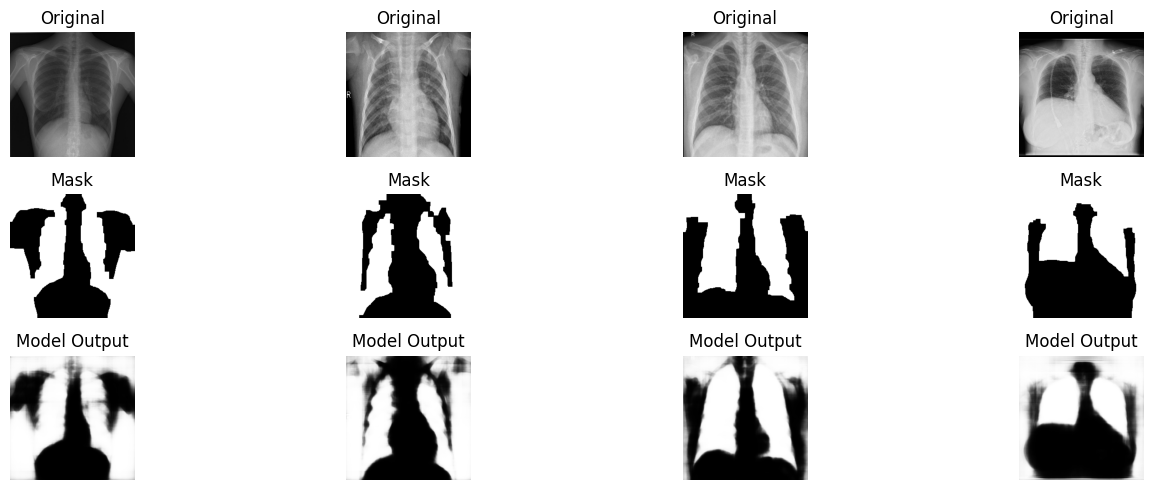

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch
from torchvision import transforms

# Function to get a random image and its mask from each class
def get_random_image_paths(image_dir, mask_dir):
    classes = os.listdir(image_dir)  # List of class folders
    random_images = []

    for class_name in classes:
        class_folder = os.path.join(image_dir, class_name)
        images = [f for f in os.listdir(class_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        if images:  # Check if there are images in the class folder
            random_image = random.choice(images)
            img_path = os.path.join(class_folder, random_image)

            # Adjust mask name to match the corresponding mask image
            mask_name = os.path.splitext(random_image)[0] + '_mask.png'
            mask_path = os.path.join(mask_dir, class_name, mask_name)

            if os.path.exists(mask_path):  # Ensure the mask exists
                random_images.append((img_path, mask_path))
            else:
                print(f"Mask not found for {img_path}")

    return random_images

# Function to get the model's output for a specific image
def get_model_output(model, image_path, device):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))  # Resize to match model input size
    image_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)  # Add batch dimension and move to device
    with torch.no_grad():  # Disable gradient calculation
        output = model(image_tensor)
    output = torch.sigmoid(output).cpu().numpy()[0, 0]  # Apply sigmoid and remove batch dimension
    return output

# Function to visualize images
def visualize_images(original_images, masks, outputs):
    plt.figure(figsize=(15, 5))
    for i in range(len(original_images)):
        plt.subplot(3, len(original_images), i + 1)
        plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_GRAY2RGB))
        plt.title("Original")
        plt.axis('off')

        plt.subplot(3, len(original_images), i + 1 + len(original_images))
        plt.imshow(cv2.cvtColor(masks[i], cv2.COLOR_GRAY2RGB))
        plt.title("Mask")
        plt.axis('off')

        plt.subplot(3, len(original_images), i + 1 + 2 * len(original_images))
        plt.imshow(outputs[i], cmap='gray')
        plt.title("Model Output")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define the directories for the images and masks
train_images_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/images_subset_split/train'
train_masks_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/masks_subset_2'

# Get random images and their corresponding masks
random_image_paths = get_random_image_paths(train_images_dir, train_masks_dir)

# Prepare lists for visualization
original_images = []
masks = []
outputs = []

# Loop through the random images to load them and get model outputs
for img_path, mask_path in random_image_paths:
    original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    output = get_model_output(model, img_path, device)

    original_images.append(original_image)
    masks.append(mask)
    outputs.append(output)

# Visualize the images
visualize_images(original_images, masks, outputs)

# **Manually Annotated Mask Based Segmentation Using UNet**

In [ ]:
# Install OpenCV and Pillow
!pip install opencv-python pillow

In [ ]:
import numpy as np
import os
import random
import cv2
from PIL import Image
import shutil
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
import os
import sys
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to match your directory structure
from unet import UNet

# Test if UNet can be instantiated correctly
try:
    test_model = UNet(n_channels=1, n_classes=1)  # Adjust as per your model's parameters
    print("UNet imported successfully. Model summary:")
    print(test_model)
except Exception as e:
    print("Error importing UNet:", e)

class SegmentedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        base_name = os.path.splitext(img_file)[0]
                        mask_name = f"{base_name}_mask"  # Matching mask name
                        mask_path = os.path.join(mask_dir, class_folder, mask_name + ".png")

                        if os.path.exists(mask_path):
                            self.images.append((img_path, mask_path))

        print(f"Loaded {len(self.images)} image-mask pairs.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, mask_path = self.images[idx]

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations (Resize and ToTensor)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load Dataset
train_images_dir = '/content/drive/MyDrive/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset'
train_masks_dir = '/content/drive/MyDrive/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Masked Image Subset'
train_dataset = SegmentedDataset(train_images_dir, train_masks_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Adjust batch size as needed

# Initialize UNet model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1)
model.to(device)

# Loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Function to calculate metrics: accuracy, precision, recall, F1-score
def calculate_metrics(outputs, masks):
    # Apply sigmoid activation and thresholding
    predicted = (torch.sigmoid(outputs) > 0.5).byte()  # Get binary predictions
    masks = masks.byte()

    # Flatten tensors
    predicted = predicted.view(-1).cpu().numpy()
    masks = masks.view(-1).cpu().numpy()

    # Calculate metrics
    accuracy = (predicted == masks).sum() / masks.size
    precision = precision_score(masks, predicted, zero_division=1)
    recall = recall_score(masks, predicted, zero_division=1)
    f1 = f1_score(masks, predicted, zero_division=1)

    return accuracy, precision, recall, f1

# Training loop
epochs = 10
results = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    total_accuracy = 0.0
    total_precision = 0.0
    total_recall = 0.0
    total_f1 = 0.0

    # Create a progress bar with tqdm
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{epochs}", unit='batch') as pbar:
        for images, masks in train_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            accuracy, precision, recall, f1 = calculate_metrics(outputs, masks)
            total_accuracy += accuracy
            total_precision += precision
            total_recall += recall
            total_f1 += f1

            # Update progress bar
            pbar.set_postfix(loss=running_loss / (pbar.n + 1),
                             accuracy=total_accuracy / (pbar.n + 1),
                             precision=total_precision / (pbar.n + 1),
                             recall=total_recall / (pbar.n + 1),
                             f1=total_f1 / (pbar.n + 1))
            pbar.update(1)

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = total_accuracy / len(train_loader)
    avg_precision = total_precision / len(train_loader)
    avg_recall = total_recall / len(train_loader)
    avg_f1 = total_f1 / len(train_loader)

    print(f"Epoch [{epoch + 1}/{epochs}], Avg Loss: {avg_loss:.4f}, Avg Accuracy: {avg_accuracy:.4f}, Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}, F1-Score: {avg_f1:.4f}")

    # Store results for each epoch
    results.append([epoch + 1, avg_loss, avg_accuracy, avg_precision, avg_recall, avg_f1])

# Save the model
model_save_path = '/content/drive/MyDrive/Subset Images for Segmentation/trained_unet_model_manually_annotated_mask_segmentation.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# Save training metrics to CSV
results_df = pd.DataFrame(results, columns=['Epoch', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
csv_save_path = '/content/drive/MyDrive/Subset Images for Segmentation/training_results_manually_annotated_mask_segmentation.csv'
results_df.to_csv(csv_save_path, index=False)
print(f"Training results saved to {csv_save_path}")

print("Training completed.")

UNet imported successfully. Model summary:
UNet(
  (in_conv): UNetConvBlock(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (Down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): UNetConvBlock(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

Epoch 1/10: 100%|██████████| 188/188 [1:35:10<00:00, 30.38s/batch, accuracy=0.948, f1=0.893, loss=0.157, precision=0.904, recall=0.888]


Epoch [1/10], Avg Loss: 0.1573, Avg Accuracy: 0.9480, Precision: 0.9042, Recall: 0.8876, F1-Score: 0.8935


Epoch 2/10: 100%|██████████| 188/188 [06:41<00:00,  2.13s/batch, accuracy=0.978, f1=0.953, loss=0.0613, precision=0.961, recall=0.946]


Epoch [2/10], Avg Loss: 0.0613, Avg Accuracy: 0.9780, Precision: 0.9610, Recall: 0.9462, F1-Score: 0.9533


Epoch 3/10: 100%|██████████| 188/188 [06:38<00:00,  2.12s/batch, accuracy=0.982, f1=0.962, loss=0.0472, precision=0.968, recall=0.957]


Epoch [3/10], Avg Loss: 0.0472, Avg Accuracy: 0.9821, Precision: 0.9678, Recall: 0.9569, F1-Score: 0.9621


Epoch 4/10: 100%|██████████| 188/188 [06:39<00:00,  2.13s/batch, accuracy=0.984, f1=0.967, loss=0.0403, precision=0.971, recall=0.963]


Epoch [4/10], Avg Loss: 0.0403, Avg Accuracy: 0.9843, Precision: 0.9708, Recall: 0.9632, F1-Score: 0.9668


Epoch 5/10: 100%|██████████| 188/188 [06:40<00:00,  2.13s/batch, accuracy=0.986, f1=0.971, loss=0.035, precision=0.974, recall=0.968]


Epoch [5/10], Avg Loss: 0.0350, Avg Accuracy: 0.9861, Precision: 0.9739, Recall: 0.9676, F1-Score: 0.9706


Epoch 6/10: 100%|██████████| 188/188 [06:39<00:00,  2.12s/batch, accuracy=0.987, f1=0.973, loss=0.0319, precision=0.976, recall=0.971]


Epoch [6/10], Avg Loss: 0.0319, Avg Accuracy: 0.9872, Precision: 0.9755, Recall: 0.9706, F1-Score: 0.9730


Epoch 7/10: 100%|██████████| 188/188 [06:38<00:00,  2.12s/batch, accuracy=0.989, f1=0.977, loss=0.0263, precision=0.979, recall=0.976]


Epoch [7/10], Avg Loss: 0.0263, Avg Accuracy: 0.9893, Precision: 0.9790, Recall: 0.9760, F1-Score: 0.9774


Epoch 8/10: 100%|██████████| 188/188 [06:38<00:00,  2.12s/batch, accuracy=0.989, f1=0.977, loss=0.0259, precision=0.98, recall=0.976]


Epoch [8/10], Avg Loss: 0.0259, Avg Accuracy: 0.9893, Precision: 0.9796, Recall: 0.9756, F1-Score: 0.9775


Epoch 9/10: 100%|██████████| 188/188 [06:38<00:00,  2.12s/batch, accuracy=0.99, f1=0.979, loss=0.0243, precision=0.98, recall=0.977]


Epoch [9/10], Avg Loss: 0.0243, Avg Accuracy: 0.9899, Precision: 0.9802, Recall: 0.9774, F1-Score: 0.9788


Epoch 10/10: 100%|██████████| 188/188 [06:37<00:00,  2.12s/batch, accuracy=0.991, f1=0.981, loss=0.0212, precision=0.982, recall=0.98]


Epoch [10/10], Avg Loss: 0.0212, Avg Accuracy: 0.9911, Precision: 0.9822, Recall: 0.9803, F1-Score: 0.9812
Model saved at /content/drive/MyDrive/Subset Images for Segmentation/trained_unet_model_manually_annoted_mask_segmentation.pth
Training results saved to /content/drive/MyDrive/Subset Images for Segmentation/training_results_manually_annoted_mask_segmentation.csv
Training completed.


In [ ]:
import torch
from torch.utils.data import DataLoader
import cv2
from torchvision import transforms
from unet import UNet  # Make sure this is correct for your model's path
import os
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1)
model.to(device)
model_path = '/content/drive/MyDrive/model/UNET_trained_model_manually_annotated_mask_segmentation.pth'
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode

# Define IoU function
def calculate_iou(outputs, masks):
    # Apply sigmoid activation and thresholding
    predicted = (torch.sigmoid(outputs) > 0.5).byte()
    masks = masks.byte()

    intersection = (predicted & masks).sum().float()
    union = (predicted | masks).sum().float()

    iou = intersection / (union + 1e-6)  # Adding a small epsilon to avoid division by zero
    return iou.item()

# Define the dataset and dataloader (same as training)
class SegmentedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        base_name = os.path.splitext(img_file)[0]
                        mask_name = f"{base_name}_mask"  # Matching mask name
                        mask_path = os.path.join(mask_dir, class_folder, mask_name + ".png")

                        if os.path.exists(mask_path):
                            self.images.append((img_path, mask_path))

        print(f"Loaded {len(self.images)} image-mask pairs.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, mask_path = self.images[idx]
        print(f"Loading image: {img_path}")  # Debug print

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations (same as training)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load Dataset for evaluation (you can choose test or validation dataset)
test_images_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset'
test_masks_dir = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Masked Image Subset'
test_dataset = SegmentedDataset(test_images_dir, test_masks_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Calculate IoU for the dataset
iou_scores = []

with torch.no_grad():
    for i, (images, masks) in enumerate(test_loader):
        print(f"Processing batch {i + 1}/{len(test_loader)}")  # Debug print
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate IoU
        iou = calculate_iou(outputs, masks)
        iou_scores.append(iou)

# Compute the average IoU score
avg_iou = sum(iou_scores) / len(iou_scores)
print(f"Average IoU: {avg_iou:.4f}")

<ipython-input-18-e73a3b7fe9ad>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Loaded 3000 image-mask pairs.
Loading image: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset/NORMAL/NORMAL (10).png
Loading image: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset/NORMAL/NORMAL (1000).png
Loading image: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset/NORMAL/NORMAL (1).png
Loading image: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset/NORMAL/NORMAL (100).png
Loading image: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset/NORMAL/NORMAL (101).png
Loading image: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/Segmented Dataset (Already Mask Generated)/Original Image Subset/

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
import os
import sys
from PIL import Image
import numpy as np

# Define your UNet model architecture
sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to match your directory structure
from unet import UNet  # Adjust the path to the UNet definition file

# Directory paths
test_images_dir = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/test'
save_masks_dir = '/content/drive/MyDrive/Dataset/Masks Dataset (Split)/test'

# Make sure the saving directory exists and create class-specific folders
class_folders = ['COVID', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']
for class_folder in class_folders:
    os.makedirs(os.path.join(save_masks_dir, class_folder), exist_ok=True)

# Define dataset class for test images
class TestDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.images = []

        for class_folder in os.listdir(image_dir):
            class_folder_path = os.path.join(image_dir, class_folder)
            if os.path.isdir(class_folder_path):
                for img_file in os.listdir(class_folder_path):
                    if img_file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Filter image files
                        img_path = os.path.join(class_folder_path, img_file)
                        self.images.append((img_path, class_folder))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, class_folder = self.images[idx]
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")

        if self.transform:
            image = self.transform(image)

        return image, img_path, class_folder

# Define the transform (same as used during training)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load test dataset and DataLoader
test_dataset = TestDataset(test_images_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # No shuffling needed for testing

# Load the saved model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1)
model.to(device)

# Load the trained model weights
model_load_path = '/content/drive/MyDrive/model/trained_unet_model_manually_annotated_mask_segmentation.pth'
model.load_state_dict(torch.load(model_load_path, map_location=device))
model.eval()  # Set the model to evaluation mode

# Inference loop to generate masks
with torch.no_grad():
    for images, img_paths, class_folders in test_loader:
        images = images.to(device)

        # Perform inference to generate masks
        outputs = model(images)
        predicted_masks = (torch.sigmoid(outputs) > 0.5).cpu().numpy()  # Get binary masks

        # Save the generated masks
        for i, img_path in enumerate(img_paths):
            # Extract image filename without extension
            img_name = os.path.splitext(os.path.basename(img_path))[0]

            # Create the corresponding mask filename
            mask_name = f"{img_name}_mask.png"

            # Convert predicted mask back to image format (0-255 range for binary masks)
            predicted_mask = (predicted_masks[i][0] * 255).astype(np.uint8)

            # Resize back to original image size (if needed)
            original_image = Image.open(img_path)
            original_size = original_image.size
            predicted_mask = cv2.resize(predicted_mask, original_size, interpolation=cv2.INTER_NEAREST)

            # Save the mask in the appropriate folder
            class_folder = class_folders[i]
            mask_save_path = os.path.join(save_masks_dir, class_folder, mask_name)
            cv2.imwrite(mask_save_path, predicted_mask)

            print(f"Saved mask: {mask_save_path}")

print("All masks generated and saved.")

<ipython-input-18-48fe00276a95>:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_load_path, map_location=device))


Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (4276)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (2024)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (3024)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (2826)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (1770)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (1862)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (3949)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (3254)_mask.png
Saved mask: /content/drive/MyDrive/Dataset/Masks Dataset (Split)/test/TUBERCULOSIS/TUBERCULOSIS (392)_ma

In [ ]:
# Verify the number of images in the masks
subset_masks_path = '/content/drive/MyDrive/Dataset/Masks Dataset (Split)/test'
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

for class_name in classes:
    subset_class_dir = os.path.join(subset_masks_path, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 751 images
PNEUMONIA: 751 images
NORMAL: 751 images
COVID: 751 images


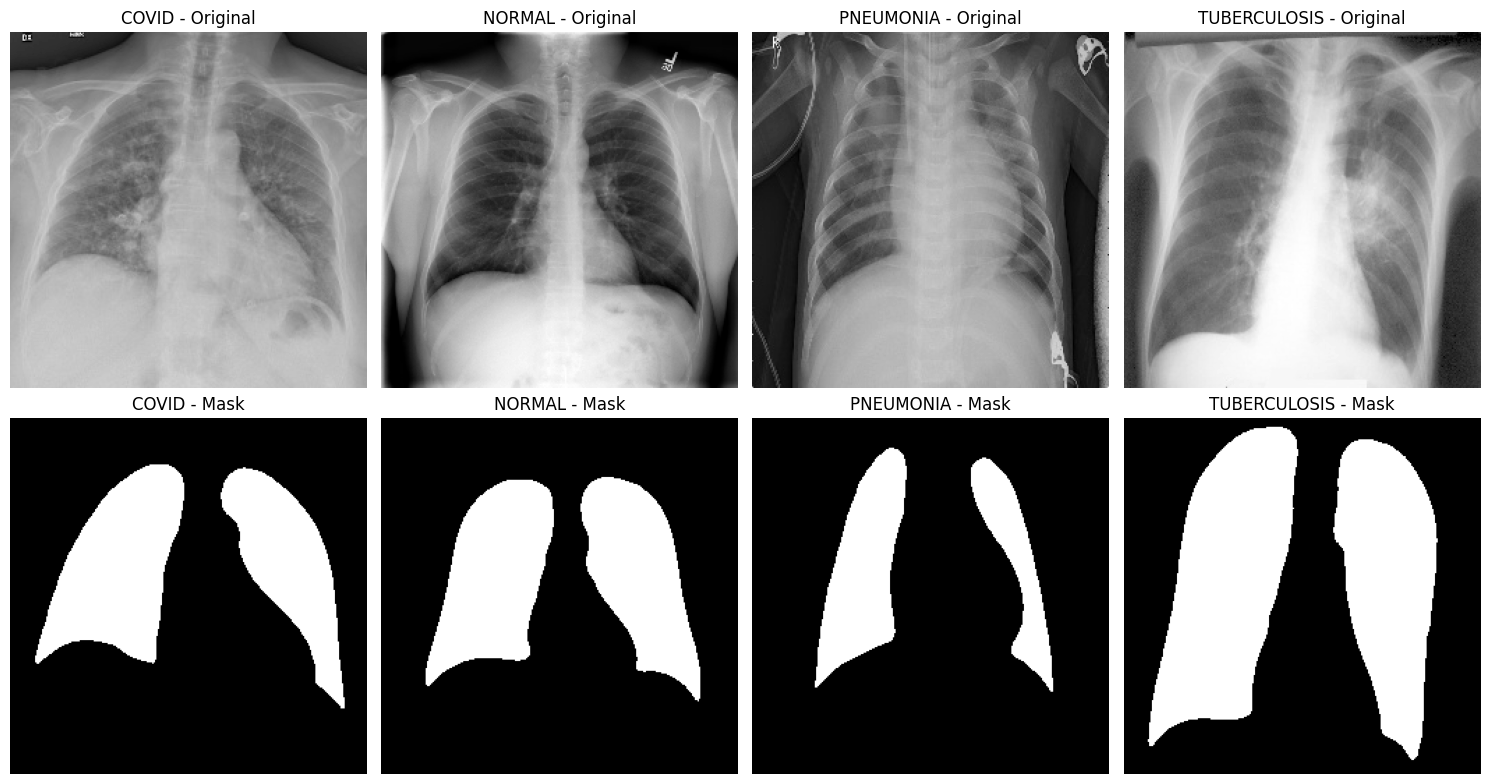

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Classes
class_folders = ['COVID', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']

# Function to display images and masks in a 2x4 grid (4 original -> 4 mask)
def display_images_and_masks_side_by_side(images, masks, titles):
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # 2 rows, 4 columns

    # Plot original images
    for i, image in enumerate(images):
        axes[0, i].imshow(image, cmap='gray')
        axes[0, i].set_title(f"{titles[i]} - Original")
        axes[0, i].axis('off')

    # Plot corresponding masks
    for i, mask in enumerate(masks):
        axes[1, i].imshow(mask, cmap='gray')
        axes[1, i].set_title(f"{titles[i]} - Mask")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Function to load and display one random sample from each class
def show_random_samples_from_classes():
    images = []
    masks = []
    titles = []

    for class_folder in class_folders:
        # Get all image filenames in the class folder
        class_image_dir = os.path.join(test_images_dir, class_folder)
        class_mask_dir = os.path.join(save_masks_dir, class_folder)

        image_files = [img for img in os.listdir(class_image_dir) if img.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

        # Randomly select one image
        img_name = random.choice(image_files)

        # Load the original image
        img_path = os.path.join(class_image_dir, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Load the corresponding mask
        base_name = os.path.splitext(img_name)[0]
        mask_name = f"{base_name}_mask.png"
        mask_path = os.path.join(class_mask_dir, mask_name)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image at {img_path} could not be loaded.")
        if mask is None:
            raise ValueError(f"Mask at {mask_path} could not be loaded.")

        # Append to list for display
        images.append(image)
        masks.append(mask)
        titles.append(class_folder)

    # Display the selected images and masks side by side
    display_images_and_masks_side_by_side(images, masks, titles)

# Call the function to display random samples
show_random_samples_from_classes()

# **Accuracy and Loss Scores**

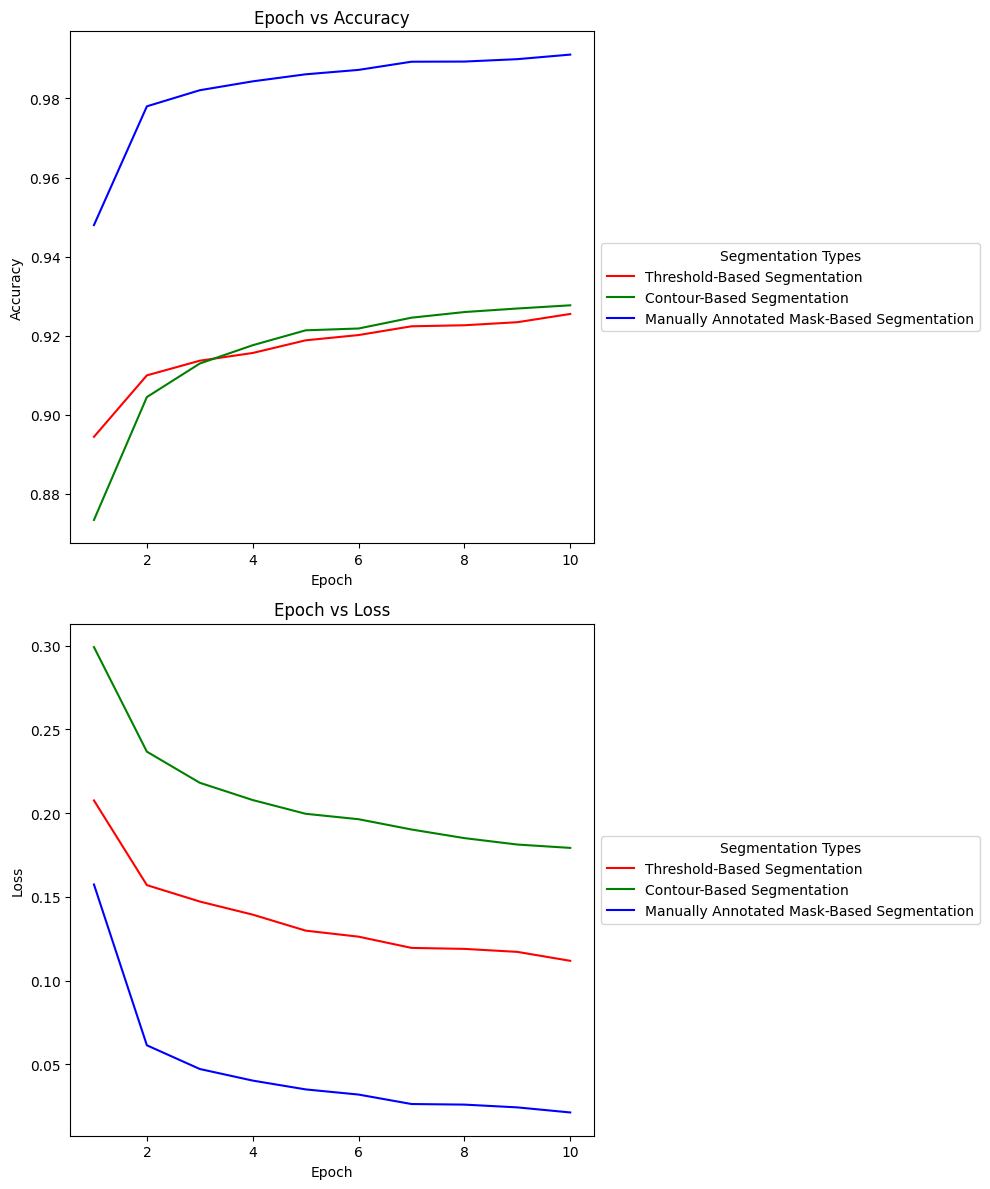

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Paths to CSV files
path1 = '/content/drive/MyDrive/training_results_threshold_based_segmentation.csv'
path2 = '/content/drive/MyDrive/training_results_contour_based_segmentation.csv'
path3 = '/content/drive/MyDrive/training_results_manually_annotated_mask_segmentation.csv'

# Load the data from the CSV files
threshold_data = pd.read_csv(path1)
contour_data = pd.read_csv(path2)
manual_data = pd.read_csv(path3)

# Define colors for the segmentations
colors = {
    'Threshold-Based Segmentation': 'red',
    'Contour-Based Segmentation': 'green',
    'Manually Annotated Mask-Based Segmentation': 'blue'
}

# Create subplots for the two graphs
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the first graph (Epoch vs Accuracy)
axes[0].plot(threshold_data['Epoch'], threshold_data['Accuracy'], label='Threshold-Based Segmentation', color=colors['Threshold-Based Segmentation'])
axes[0].plot(contour_data['Epoch'], contour_data['Accuracy'], label='Contour-Based Segmentation', color=colors['Contour-Based Segmentation'])
axes[0].plot(manual_data['Epoch'], manual_data['Accuracy'], label='Manually Annotated Mask-Based Segmentation', color=colors['Manually Annotated Mask-Based Segmentation'])
axes[0].set_title('Epoch vs Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Move the legend outside the plot to the right
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Segmentation Types", fontsize=10)

# Plot the second graph (Epoch vs Loss)
axes[1].plot(threshold_data['Epoch'], threshold_data['Loss'], label='Threshold-Based Segmentation', color=colors['Threshold-Based Segmentation'])
axes[1].plot(contour_data['Epoch'], contour_data['Loss'], label='Contour-Based Segmentation', color=colors['Contour-Based Segmentation'])
axes[1].plot(manual_data['Epoch'], manual_data['Loss'], label='Manually Annotated Mask-Based Segmentation', color=colors['Manually Annotated Mask-Based Segmentation'])
axes[1].set_title('Epoch vs Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Move the legend outside the plot to the right for the second graph
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Segmentation Types", fontsize=10)

# Adjust the layout of the figure
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-17-698e44f2d8db>:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=15.0)  # Reduce the padding between subplots


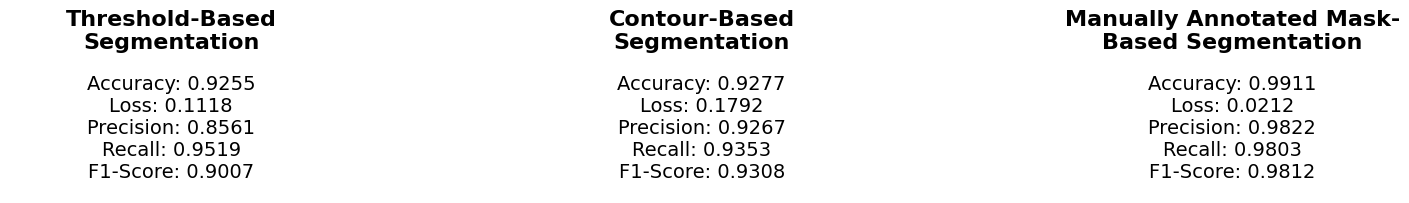

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from textwrap import wrap

# Paths to CSV files
path1 = '/content/drive/MyDrive/training_results_threshold_based_segmentation.csv'
path2 = '/content/drive/MyDrive/training_results_contour_based_segmentation.csv'
path3 = '/content/drive/MyDrive/training_results_manually_annotated_mask_segmentation.csv'

# Load the data from the CSV files
threshold_data = pd.read_csv(path1)
contour_data = pd.read_csv(path2)
manual_data = pd.read_csv(path3)

# Create the summary boxes for the last epoch (10th epoch)
last_epoch = 9  # Python index for the 10th epoch (index starts at 0)
metrics = ['Accuracy', 'Loss', 'Precision', 'Recall', 'F1-Score']

# Create a figure for the 3 boxes, and use 'constrained_layout' to ensure equal sizing
fig2, ax2 = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)  # Increased figure size for larger boxes

# Plot data for each segmentation method in a box
for idx, (title, data) in enumerate([
    ('Threshold-Based Segmentation', threshold_data),
    ('Contour-Based Segmentation', contour_data),
    ('Manually Annotated Mask-Based Segmentation', manual_data)
]):
    # Extract the 10th epoch's results
    scores = data.loc[last_epoch, metrics]

    # Create text for the box with larger font size
    box_text = '\n'.join([f"{metric}: {score:.4f}" for metric, score in zip(metrics, scores)])

    # Add text box with customized fonts
    ax2[idx].text(0.5, 0.5, box_text, fontsize=14, ha='center', va='center')

    # Adjust the title, splitting it into two lines if it's too long
    wrapped_title = "\n".join(wrap(title, width=25))  # Split title to two lines if necessary
    ax2[idx].set_title(wrapped_title, fontsize=16, weight='bold', pad=10)  # Larger, bolder title, reduced padding

    ax2[idx].axis('off')  # Turn off axis for clean look

    # Add black border using patches
    rect = patches.Rectangle((-0.05, -0.05), 1.1, 1.1, linewidth=2, edgecolor='black', facecolor='none', transform=ax2[idx].transAxes)
    ax2[idx].add_patch(rect)

# Adjust layout and reduce space between title and box contents
plt.tight_layout(pad=15.0)  # Reduce the padding between subplots
plt.show()

# **Mask-Based Extraction**

In [ ]:
# Install OpenCV and Pillow
!pip install opencv-python pillow

In [ ]:
import numpy as np
import os
import random
import cv2
from PIL import Image
import shutil
import matplotlib.pyplot as plt

<ipython-input-17-3bba03767810>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=torch.device('cpu'))


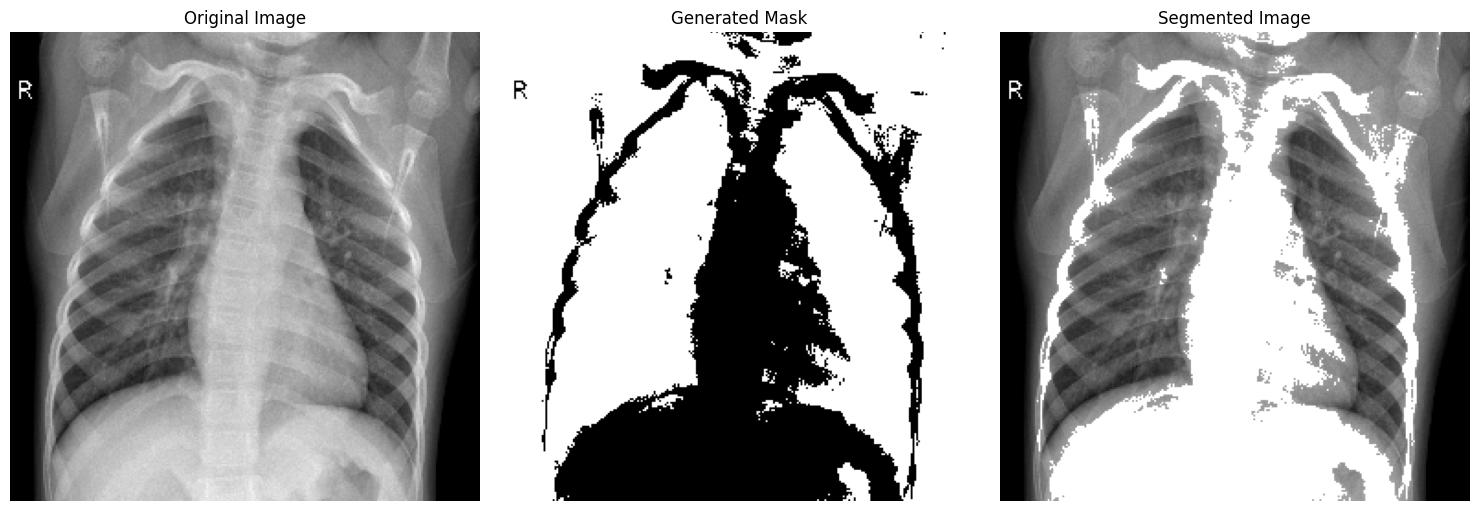

In [ ]:
import os
import cv2
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Import your UNet model
import sys
sys.path.append('/content/drive/MyDrive/model')  # Adjust the path to your UNet definition
from unet import UNet

# Load the trained UNet model
def load_unet_model(model_path):
    model = UNet(n_channels=1, n_classes=1)  # Grayscale input, binary mask output
    state_dict = torch.load(model_path, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)
    model.eval()
    return model

# Preprocess the input image for the UNet model
def preprocess_image(image_path):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize for UNet
    ])
    input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    return input_tensor

# Generate the mask using the UNet model
def generate_mask(model, input_tensor):
    with torch.no_grad():
        output = model(input_tensor)
        mask = torch.sigmoid(output).squeeze(0).squeeze(0).numpy()  # Single-channel output
        mask = (mask > 0.5).astype(np.uint8) * 255  # Threshold and convert to binary
    return mask

# Apply the mask to the original image to create the segmented image
def apply_mask_to_image(original_image_path, mask):
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    mask_resized = cv2.resize(mask, (original_image.shape[1], original_image.shape[0]))
    binary_mask = mask_resized > 0
    segmented_image = np.where(binary_mask, original_image, 255)  # White background for non-lung areas
    return segmented_image

# Display original image, mask, and segmented image side by side
def display_results(original_image_path, mask, segmented_image):
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask and segmented image to match original for display
    mask_resized = cv2.resize(mask, (original_image.shape[1], original_image.shape[0]))
    segmented_resized = cv2.resize(segmented_image, (original_image.shape[1], original_image.shape[0]))

    # Plot side by side
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Generated Mask")
    plt.imshow(mask_resized, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Segmented Image")
    plt.imshow(segmented_resized, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Main process
if __name__ == "__main__":
    # Define paths
    unet_model_path = '/content/drive/MyDrive/model/UNET_trained_model_threshold_segmentation.pth'
    original_image_path = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/train/NORMAL/NORMAL (100).png'

    # Load UNet model
    unet_model = load_unet_model(unet_model_path)

    # Preprocess input image
    input_tensor = preprocess_image(original_image_path)

    # Generate mask
    mask = generate_mask(unet_model, input_tensor)

    # Create segmented image
    segmented_image = apply_mask_to_image(original_image_path, mask)

    # Display results
    display_results(original_image_path, mask, segmented_image)

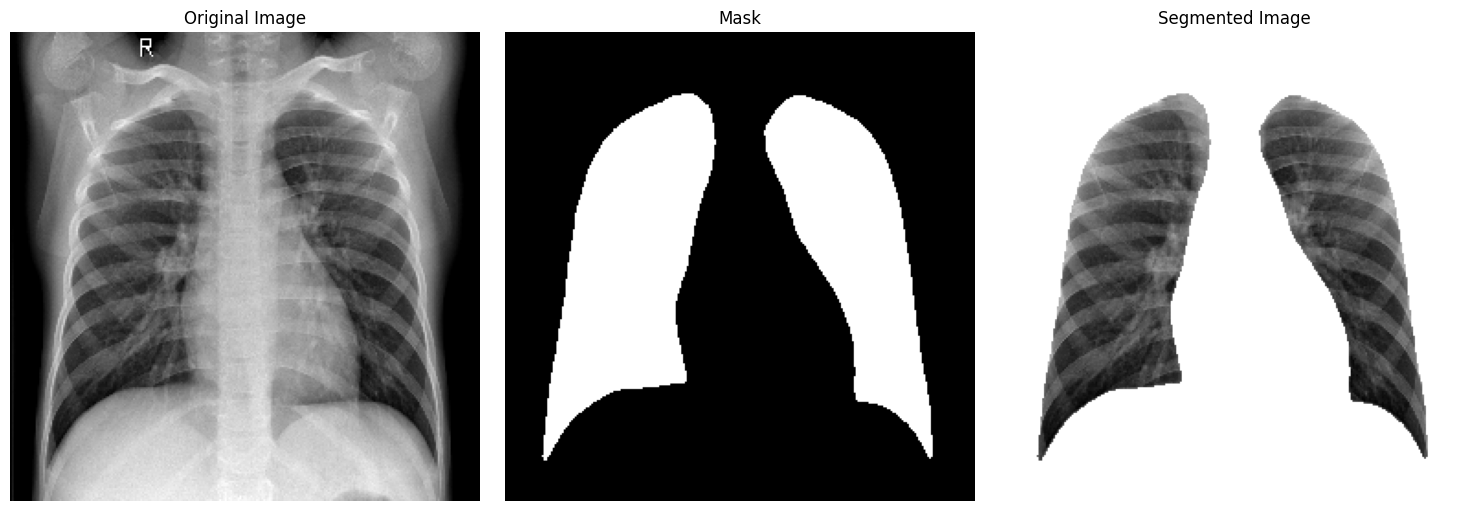

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to process and display a single image with its mask
def process_and_display_image(original_image_path, mask_image_path):
    # Load the original image
    if not os.path.exists(original_image_path):
        print(f"Original image not found: {original_image_path}")
        return

    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    # Load the mask image
    if not os.path.exists(mask_image_path):
        print(f"Mask image not found: {mask_image_path}")
        return

    mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match original image dimensions if necessary
    if original_image.shape != mask_image.shape:
        mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

    # Create a binary mask: white (255) for lungs, black (0) for background
    binary_mask = mask_image > 0  # Where mask is white

    # Apply the mask to the original image
    segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

    # Display the results: original image, mask, segmented image
    display_images(original_image, mask_image, segmented_lungs)

# Function to display original image, mask, and segmented image side by side
def display_images(original_image, mask_image, segmented_image):
    plt.figure(figsize=(15, 5))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.axis("off")

    # Display mask
    plt.subplot(1, 3, 2)
    plt.title("Mask")
    plt.imshow(mask_image, cmap="gray")
    plt.axis("off")

    # Display segmented image
    plt.subplot(1, 3, 3)
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Specify the paths for the original image and mask image
    original_image_path = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/train/NORMAL/NORMAL (102).png'  # Replace with your image path
    mask_image_path = '/content/drive/MyDrive/Dataset/Masks Dataset (Split)/train/NORMAL/NORMAL (102)_mask.png'  # Replace with your mask path

    process_and_display_image(original_image_path, mask_image_path)

In [ ]:
# Iterate through each class in the subset
subset_images_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/train'
subset_masks_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/train'
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

for class_name in classes:
    class_subset_dir = os.path.join(subset_images_path, class_name)
    mask_class_dir = os.path.join(subset_masks_path, class_name)
    os.makedirs(mask_class_dir, exist_ok=True)

    # List all images in the class subset directory
    images = os.listdir(class_subset_dir)

    print(f"Generating masks for class {class_name}...")

    for img_name in images:
        img_path = os.path.join(class_subset_dir, img_name)
        mask_name = os.path.splitext(img_name)[0] + '_mask.png'  # Example: image1.jpg -> image1_mask.png
        mask_path = os.path.join(mask_class_dir, mask_name)

        # Generate and save the mask
        segment_lungs_opencv(img_path, mask_path)

    print(f"Completed masks for class {class_name}")

Generating masks for class TUBERCULOSIS...
Completed masks for class TUBERCULOSIS
Generating masks for class PNEUMONIA...
Completed masks for class PNEUMONIA
Generating masks for class NORMAL...
Completed masks for class NORMAL
Generating masks for class COVID...
Completed masks for class COVID


In [ ]:
# Verify the number of images in the masks
for class_name in classes:
    subset_class_dir = os.path.join(subset_masks_path, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 699 images
PNEUMONIA: 699 images
NORMAL: 699 images
COVID: 699 images


In [ ]:
import os
import cv2
import numpy as np

# Define paths for original images, masks, and where to save segmented images
subset_images_path = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/train'
subset_masks_path = '/content/drive/MyDrive/Dataset/Masks Dataset (Split)/train'
segmented_images_path = '/content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train'

# Class folders
classes = ['TUBERCULOSIS', 'COVID']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path):
    os.makedirs(segmented_images_path)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path, class_name)
    mask_class_folder = os.path.join(subset_masks_path, class_name)
    segmented_class_folder = os.path.join(segmented_images_path, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Streaming output truncated to the last 5000 lines.
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (3048)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (4577)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (1859)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (1796)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (1563)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (3074)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/train/TUBERCULOSIS/TUBERCULOSIS (4040)_segmented.p

In [ ]:
# Verify the number of images in the masks
segmented_images_path = '/content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val'
classes = ['NORMAL', 'COVID', 'PNEUMONIA', 'TUBERCULOSIS']
for class_name in classes:
    subset_class_dir = os.path.join(segmented_images_path, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

NORMAL: 750 images
COVID: 750 images
PNEUMONIA: 750 images
TUBERCULOSIS: 750 images


In [ ]:
import os
import cv2
import numpy as np

# Define paths for original images, masks, and where to save segmented images
subset_images_path2 = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/val'
subset_masks_path2 = '/content/drive/MyDrive/Dataset/Masks Dataset (Split)/val'
segmented_images_path2 = '/content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val'

# Class folders
classes = ['NORMAL', 'COVID', 'PNEUMONIA', 'TUBERCULOSIS']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path2):
    os.makedirs(segmented_images_path2)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path2, class_name)
    mask_class_folder = os.path.join(subset_masks_path2, class_name)
    segmented_class_folder = os.path.join(segmented_images_path2, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (2736)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (2631)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (131)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (1563)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (241)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (333)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (2668)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/val/NORMAL/NORMAL (2471)_segmented.png
Segmented image saved: /con

In [ ]:
import os
import cv2
import numpy as np

# Define paths for original images, masks, and where to save segmented images
subset_images_path3 = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/test'
subset_masks_path3 = '/content/drive/MyDrive/Dataset/Masks Dataset (Split)/test'
segmented_images_path3 = '/content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test'

# Class folders
classes = ['NORMAL', 'COVID', 'PNEUMONIA', 'TUBERCULOSIS']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path3):
    os.makedirs(segmented_images_path3)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path3, class_name)
    mask_class_folder = os.path.join(subset_masks_path3, class_name)
    segmented_class_folder = os.path.join(segmented_images_path3, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (4276)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (3868)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (3801)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (313)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (2819)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (3217)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (608)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Segmentation Dataset (Split)/test/NORMAL/NORMAL (234)_segmented.png
Segmented image sav

In [ ]:
# Iterate through each class in the subset
subset_images_path_2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/val'
subset_masks_path_2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/val'
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

for class_name in classes:
    class_subset_dir = os.path.join(subset_images_path_2, class_name)
    mask_class_dir = os.path.join(subset_masks_path_2, class_name)
    os.makedirs(mask_class_dir, exist_ok=True)

    # List all images in the class subset directory
    images = os.listdir(class_subset_dir)

    print(f"Generating masks for class {class_name}...")

    for img_name in images:
        img_path = os.path.join(class_subset_dir, img_name)
        mask_name = os.path.splitext(img_name)[0] + '_mask.png'  # Example: image1.jpg -> image1_mask.png
        mask_path = os.path.join(mask_class_dir, mask_name)

        # Generate and save the mask
        segment_lungs_opencv(img_path, mask_path)

    print(f"Completed masks for class {class_name}")

Generating masks for class TUBERCULOSIS...
Completed masks for class TUBERCULOSIS
Generating masks for class PNEUMONIA...
Completed masks for class PNEUMONIA
Generating masks for class NORMAL...
Completed masks for class NORMAL
Generating masks for class COVID...
Completed masks for class COVID


In [ ]:
for class_name in classes:
    subset_class_dir = os.path.join(subset_masks_path_2, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 150 images
PNEUMONIA: 150 images
NORMAL: 150 images
COVID: 150 images


In [ ]:
# Define paths for original images, masks, and where to save segmented images
subset_images_path_2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/val'
subset_masks_path_2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/val'
segmented_images_path_2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/segmented_images_subset (4000 split version)/val'

# Class folders
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path_2):
    os.makedirs(segmented_images_path_2)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path_2, class_name)
    mask_class_folder = os.path.join(subset_masks_path_2, class_name)
    segmented_class_folder = os.path.join(segmented_images_path_2, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/val/TUBERCULOSIS/TUBERCULOSIS (2365)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/val/TUBERCULOSIS/TUBERCULOSIS (3794)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/val/TUBERCULOSIS/TUBERCULOSIS (3042)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/val/TUBERCULOSIS/TUBERCULOSIS (3929)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/val/TUBERCULOSIS/TUBERCULOSIS (1322)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_

In [ ]:
for class_name in classes:
    subset_class_dir = os.path.join(segmented_images_path_2, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 150 images
PNEUMONIA: 150 images
NORMAL: 150 images
COVID: 150 images


In [ ]:
# Iterate through each class in the subset
subset_images_path_3 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/test'
subset_masks_path_3 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/test'
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

for class_name in classes:
    class_subset_dir = os.path.join(subset_images_path_3, class_name)
    mask_class_dir = os.path.join(subset_masks_path_3, class_name)
    os.makedirs(mask_class_dir, exist_ok=True)

    # List all images in the class subset directory
    images = os.listdir(class_subset_dir)

    print(f"Generating masks for class {class_name}...")

    for img_name in images:
        img_path = os.path.join(class_subset_dir, img_name)
        mask_name = os.path.splitext(img_name)[0] + '_mask.png'  # Example: image1.jpg -> image1_mask.png
        mask_path = os.path.join(mask_class_dir, mask_name)

        # Generate and save the mask
        segment_lungs_opencv(img_path, mask_path)

    print(f"Completed masks for class {class_name}")

Generating masks for class TUBERCULOSIS...
Completed masks for class TUBERCULOSIS
Generating masks for class PNEUMONIA...
Completed masks for class PNEUMONIA
Generating masks for class NORMAL...
Completed masks for class NORMAL
Generating masks for class COVID...
Completed masks for class COVID


In [ ]:
for class_name in classes:
    subset_class_dir = os.path.join(subset_masks_path_3, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 151 images
PNEUMONIA: 151 images
NORMAL: 151 images
COVID: 151 images


In [ ]:
# Define paths for original images, masks, and where to save segmented images
subset_images_path_3 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/test'
subset_masks_path_3 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/masks_subset_2 (4000 split version)/test'
segmented_images_path_3 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/segmented_images_subset (4000 split version)/test'

# Class folders
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path_3):
    os.makedirs(segmented_images_path_3)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path_3, class_name)
    mask_class_folder = os.path.join(subset_masks_path_3, class_name)
    segmented_class_folder = os.path.join(segmented_images_path_3, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/test/TUBERCULOSIS/TUBERCULOSIS (1422)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/test/TUBERCULOSIS/TUBERCULOSIS (1432)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/test/TUBERCULOSIS/TUBERCULOSIS (3030)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/test/TUBERCULOSIS/TUBERCULOSIS (2538)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 split version)/test/TUBERCULOSIS/TUBERCULOSIS (921)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmen

In [ ]:
for class_name in classes:
    subset_class_dir = os.path.join(segmented_images_path_3, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 151 images
PNEUMONIA: 151 images
NORMAL: 151 images
COVID: 151 images


In [ ]:
# Iterate through each class in the subset
subset_images_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'
subset_masks_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/masks_subset_2 (4000 version)'
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

for class_name in classes:
    class_subset_dir = os.path.join(subset_images_path_4, class_name)
    mask_class_dir = os.path.join(subset_masks_path_4, class_name)
    os.makedirs(mask_class_dir, exist_ok=True)

    # List all images in the class subset directory
    images = os.listdir(class_subset_dir)

    print(f"Generating masks for class {class_name}...")

    for img_name in images:
        img_path = os.path.join(class_subset_dir, img_name)
        mask_name = os.path.splitext(img_name)[0] + '_mask.png'  # Example: image1.jpg -> image1_mask.png
        mask_path = os.path.join(mask_class_dir, mask_name)

        # Generate and save the mask
        segment_lungs_opencv(img_path, mask_path)

    print(f"Completed masks for class {class_name}")

Generating masks for class TUBERCULOSIS...
Completed masks for class TUBERCULOSIS
Generating masks for class PNEUMONIA...
Completed masks for class PNEUMONIA
Generating masks for class NORMAL...
Completed masks for class NORMAL
Generating masks for class COVID...
Completed masks for class COVID


In [ ]:
for class_name in classes:
    subset_class_dir = os.path.join(subset_masks_path_4, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 1000 images
PNEUMONIA: 1000 images
NORMAL: 1000 images
COVID: 1000 images


In [ ]:
# Define paths for original images, masks, and where to save segmented images
subset_images_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'
subset_masks_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/masks_subset_2 (4000 version)'
segmented_images_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/segmented_images_subset (4000 version)'

# Class folders
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path_4):
    os.makedirs(segmented_images_path_4)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path_4, class_name)
    mask_class_folder = os.path.join(subset_masks_path_4, class_name)
    segmented_class_folder = os.path.join(segmented_images_path_4, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 version)/TUBERCULOSIS/TUBERCULOSIS (896)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 version)/TUBERCULOSIS/TUBERCULOSIS (3101)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 version)/TUBERCULOSIS/TUBERCULOSIS (3612)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 version)/TUBERCULOSIS/TUBERCULOSIS (2499)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 version)/TUBERCULOSIS/TUBERCULOSIS (1996)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/segmented_images_subset (4000 version)/TUBERCULOSIS/TUBERCULO

In [ ]:
segmented_images_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/segmented_images_subset (4000 version)'
for class_name in classes:
    subset_class_dir = os.path.join(segmented_images_path_4, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 1000 images
PNEUMONIA: 1000 images
NORMAL: 1000 images
COVID: 1000 images


Enter the name of the image file (with extension) you want to display from the TUBERCULOSIS class: TUBERCULOSIS (4022).jpg
Enter the name of the image file (with extension) you want to display from the PNEUMONIA class: PNEUMONIA (720).jpg
Enter the name of the image file (with extension) you want to display from the NORMAL class: NORMAL (333).png
Enter the name of the image file (with extension) you want to display from the COVID class: COVID (3162).jpg


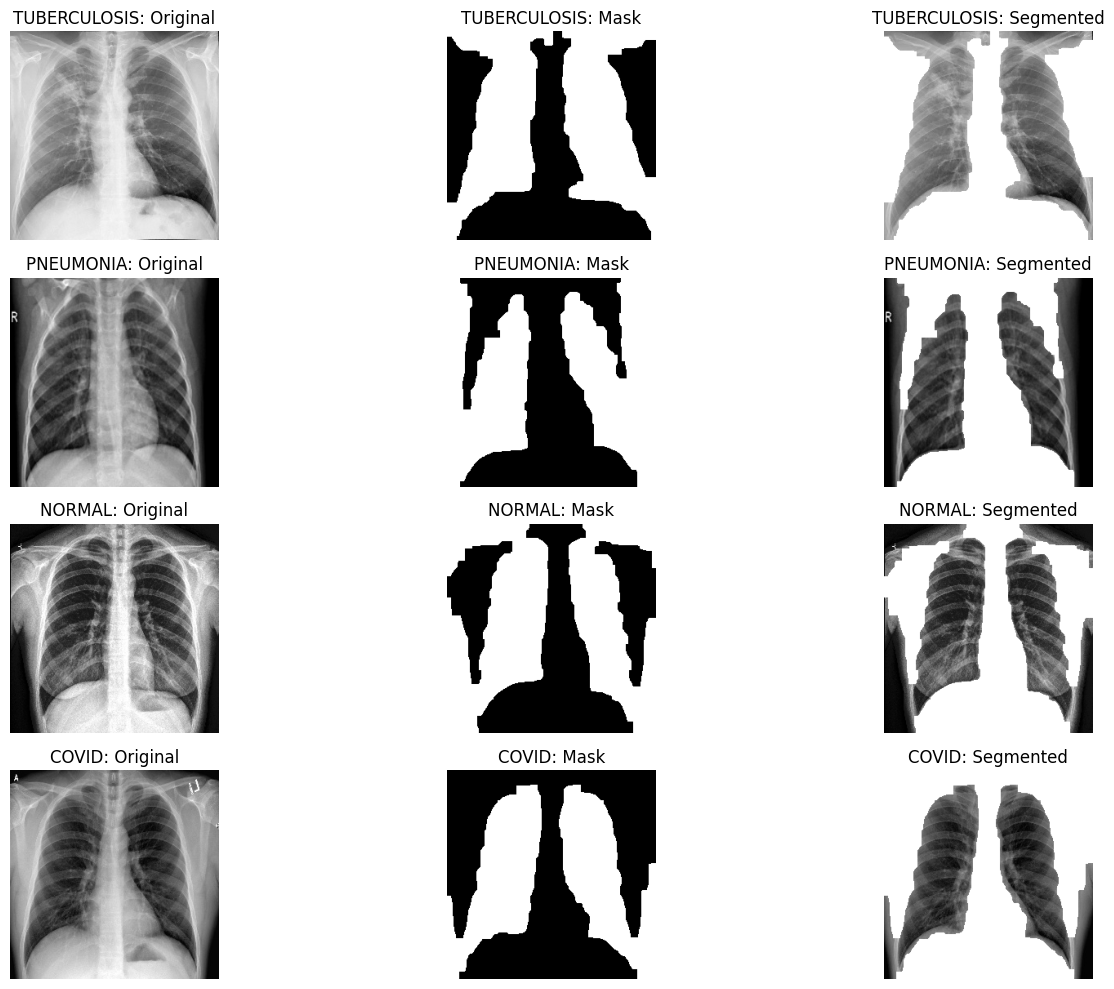

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths for original images, masks, and segmented images
subset_images_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'
subset_masks_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/masks_subset_2 (4000 version)'
segmented_images_path_4 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/segmented_images_subset (4000 version)'

# Class folders
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Helper function to find the corresponding mask or segmented image with any extension
def find_corresponding_file(folder_path, base_name):
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        file_path = os.path.join(folder_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None  # Return None if no file is found

# Function to select an image based on provided filenames for each class
def get_selected_images_by_filename(classes, subset_images_path_4, subset_masks_path_4, segmented_images_path_4):
    selected_images = []
    for class_name in classes:
        # Paths for each class
        original_class_folder = os.path.join(subset_images_path_4, class_name)
        mask_class_folder = os.path.join(subset_masks_path_4, class_name)
        segmented_class_folder = os.path.join(segmented_images_path_4, class_name)

        # Ask the user to input the image file name
        image_file = input(f"Enter the name of the image file (with extension) you want to display from the {class_name} class: ")

        # Get the base name without the extension
        image_name = os.path.splitext(image_file)[0]

        # Paths for the corresponding mask and segmented images (we will now find them with different extensions)
        mask_image_path = find_corresponding_file(mask_class_folder, f"{image_name}_mask")
        segmented_image_path = find_corresponding_file(segmented_class_folder, f"{image_name}_segmented")

        # Append paths to the list (original, mask, segmented)
        if mask_image_path and segmented_image_path:
            selected_images.append((os.path.join(original_class_folder, image_file),
                                    mask_image_path,
                                    segmented_image_path))
        else:
            print(f"Error: Mask or segmented image for {image_file} not found in {class_name} folder.")
            continue

    return selected_images

# Function to display the images
def display_images(images):
    plt.figure(figsize=(15, 10))

    for idx, (original_image_path, mask_image_path, segmented_image_path) in enumerate(images):
        # Load images
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
        segmented_image = cv2.imread(segmented_image_path, cv2.IMREAD_GRAYSCALE)

        # Display Original Image
        plt.subplot(len(classes), 3, idx * 3 + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f'{classes[idx]}: Original')
        plt.axis('off')

        # Display Mask Image
        plt.subplot(len(classes), 3, idx * 3 + 2)
        plt.imshow(mask_image, cmap='gray')
        plt.title(f'{classes[idx]}: Mask')
        plt.axis('off')

        # Display Segmented Image
        plt.subplot(len(classes), 3, idx * 3 + 3)
        plt.imshow(segmented_image, cmap='gray')
        plt.title(f'{classes[idx]}: Segmented')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get images based on the provided filenames
selected_images = get_selected_images_by_filename(classes, subset_images_path_4, subset_masks_path_4, segmented_images_path_4)

# Display the selected images
display_images(selected_images)

In [ ]:
# Define paths for original images, masks, and where to save segmented images
subset_images_path_5 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'
subset_masks_path_5 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_masks_subset_3 (4000 version)'
segmented_images_path_5 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version))'

# Class folders
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Ensure the output directory exists
if not os.path.exists(segmented_images_path_5):
    os.makedirs(segmented_images_path_5)

for class_name in classes:
    # Define the paths for each class folder
    original_class_folder = os.path.join(subset_images_path_5, class_name)
    mask_class_folder = os.path.join(subset_masks_path_5, class_name)
    segmented_class_folder = os.path.join(segmented_images_path_5, class_name)

    # Ensure each class subfolder in the output directory exists
    if not os.path.exists(segmented_class_folder):
        os.makedirs(segmented_class_folder)

    # List all images in the original class folder
    image_files = [f for f in os.listdir(original_class_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Load the original image
        original_image_path = os.path.join(original_class_folder, image_file)
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Generate corresponding mask image filename and load it
        image_name = os.path.splitext(image_file)[0]
        mask_image_path = os.path.join(mask_class_folder, f"{image_name}_mask.png")
        if not os.path.exists(mask_image_path):
            print(f"Mask not found for {image_name}, skipping.")
            continue

        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Resize mask to match original image dimensions if necessary
        if original_image.shape != mask_image.shape:
            mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

        # Create a binary mask: white (255) for lungs, black (0) for background
        binary_mask = mask_image > 0  # Where mask is white

        # Apply the mask to the original image
        segmented_lungs = np.where(binary_mask, original_image, 255)  # White out the background

        # Save the segmented image
        segmented_image_filename = f"{image_name}_segmented.png"
        segmented_image_path = os.path.join(segmented_class_folder, segmented_image_filename)
        cv2.imwrite(segmented_image_path, segmented_lungs)

        print(f"Segmented image saved: {segmented_image_path}")

print("Segmentation process completed for all images.")

Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version))/TUBERCULOSIS/TUBERCULOSIS (896)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version))/TUBERCULOSIS/TUBERCULOSIS (3101)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version))/TUBERCULOSIS/TUBERCULOSIS (3612)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version))/TUBERCULOSIS/TUBERCULOSIS (2499)_segmented.png
Segmented image saved: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000

In [ ]:
for class_name in classes:
    subset_class_dir = os.path.join(segmented_images_path_5, class_name)
    num_images = len([f for f in os.listdir(subset_class_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"{class_name}: {num_images} images")

TUBERCULOSIS: 1000 images
PNEUMONIA: 1000 images
NORMAL: 1000 images
COVID: 1000 images


In [ ]:
import os
import shutil

# Define the paths
path1 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/images_subset (4000 split version)/test'
path2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version)'
path3 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Split version)/new_manual_segmented_images_subset (4000 split version)/test'

# Subclass folders
subclasses = ['NORMAL', 'COVID', 'PNEUMONIA', 'TUBERCULOSIS']

# Supported image file types
extensions = ['.png', '.jpeg', '.jpg']

# Function to find a corresponding file in path2 based on the base name
def find_corresponding_image_in_path2(class_folder_path2, base_name):
    for ext in extensions:
        file_name = base_name + "_segmented" + ext
        file_path = os.path.join(class_folder_path2, file_name)
        if os.path.exists(file_path):
            return file_path
    return None

# Ensure the subfolders exist in path3, or create them if they don't
def create_subfolders_in_path3(path3, subclasses):
    for subclass in subclasses:
        subclass_path3 = os.path.join(path3, subclass)
        os.makedirs(subclass_path3, exist_ok=True)

# Main process: Compare and copy segmented images
def compare_and_copy_images(path1, path2, path3, subclasses):
    # Create subfolders in path3 if they don't exist
    create_subfolders_in_path3(path3, subclasses)

    # Track the count of copied images per subclass
    image_counts = {subclass: 0 for subclass in subclasses}

    # Loop through each subclass
    for subclass in subclasses:
        class_folder_path1 = os.path.join(path1, subclass)
        class_folder_path2 = os.path.join(path2, subclass)
        class_folder_path3 = os.path.join(path3, subclass)

        # Ensure class folders exist in path1 and path2
        if not os.path.exists(class_folder_path1) or not os.path.exists(class_folder_path2):
            print(f"Warning: Subclass folder '{subclass}' does not exist in path1 or path2.")
            continue

        # Loop through all the images in path1 (original images)
        for image_file in os.listdir(class_folder_path1):
            # Get the base name without extension
            base_name, ext = os.path.splitext(image_file)

            # Find the corresponding segmented image in path2
            segmented_image_path = find_corresponding_image_in_path2(class_folder_path2, base_name)

            if segmented_image_path:
                # Copy the segmented image to path3
                shutil.copy(segmented_image_path, class_folder_path3)
                image_counts[subclass] += 1
            else:
                print(f"Segmented image not found for {image_file} in {subclass} class.")

    return image_counts

# Function to display the final count of images in each subclass in path3
def display_image_counts(image_counts):
    print("\nImage counts in path3:")
    for subclass, count in image_counts.items():
        print(f"{subclass}: {count} images")

# Run the comparison and copy process
image_counts = compare_and_copy_images(path1, path2, path3, subclasses)

# Display the final count of images in each subclass in path3
display_image_counts(image_counts)


Image counts in path3:
NORMAL: 151 images
COVID: 151 images
PNEUMONIA: 151 images
TUBERCULOSIS: 151 images


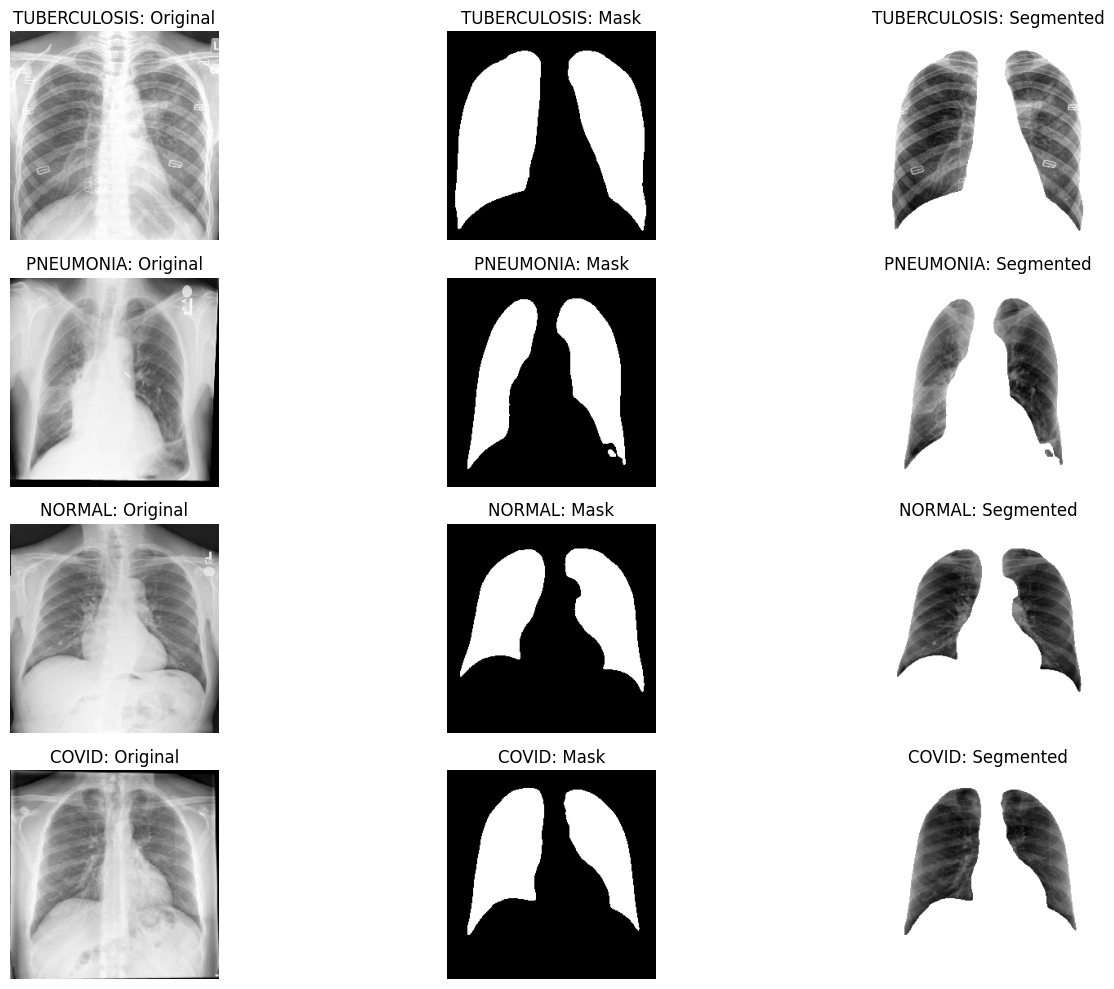

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths for original images, masks, and segmented images
subset_images_path_5 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'
subset_masks_path_5 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_masks_subset_3 (4000 version)'
segmented_images_path_5 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version))'

# Class folders
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Helper function to find the corresponding mask or segmented image with any extension
def find_corresponding_file(folder_path, base_name):
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        file_path = os.path.join(folder_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None  # Return None if no file is found

# Function to randomly select an image from each class
def get_random_images(classes, subset_images_path_5, subset_masks_path_5, segmented_images_path_5):
    selected_images = []
    for class_name in classes:
        # Paths for each class
        original_class_folder = os.path.join(subset_images_path_5, class_name)
        mask_class_folder = os.path.join(subset_masks_path_5, class_name)
        segmented_class_folder = os.path.join(segmented_images_path_5, class_name)

        # List all image files in the class folder
        image_files = [img for img in os.listdir(original_class_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

        if len(image_files) == 0:
            print(f"No images found in {class_name} folder.")
            continue

        # Randomly select an image
        image_file = random.choice(image_files)

        # Get the base name without the extension
        image_name = os.path.splitext(image_file)[0]

        # Paths for the corresponding mask and segmented images (find them with different extensions)
        mask_image_path = find_corresponding_file(mask_class_folder, f"{image_name}_mask")
        segmented_image_path = find_corresponding_file(segmented_class_folder, f"{image_name}_segmented")

        # Append paths to the list (original, mask, segmented)
        if mask_image_path and segmented_image_path:
            selected_images.append((os.path.join(original_class_folder, image_file),
                                    mask_image_path,
                                    segmented_image_path))
        else:
            print(f"Error: Mask or segmented image for {image_file} not found in {class_name} folder.")
            continue

    return selected_images

# Function to display the images
def display_images(images):
    plt.figure(figsize=(15, 10))

    for idx, (original_image_path, mask_image_path, segmented_image_path) in enumerate(images):
        # Load images
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
        segmented_image = cv2.imread(segmented_image_path, cv2.IMREAD_GRAYSCALE)

        # Display Original Image
        plt.subplot(len(classes), 3, idx * 3 + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f'{classes[idx]}: Original')
        plt.axis('off')

        # Display Mask Image
        plt.subplot(len(classes), 3, idx * 3 + 2)
        plt.imshow(mask_image, cmap='gray')
        plt.title(f'{classes[idx]}: Mask')
        plt.axis('off')

        # Display Segmented Image
        plt.subplot(len(classes), 3, idx * 3 + 3)
        plt.imshow(segmented_image, cmap='gray')
        plt.title(f'{classes[idx]}: Segmented')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get random images for each class
random_images = get_random_images(classes, subset_images_path_5, subset_masks_path_5, segmented_images_path_5)

# Display the selected random images
display_images(random_images)

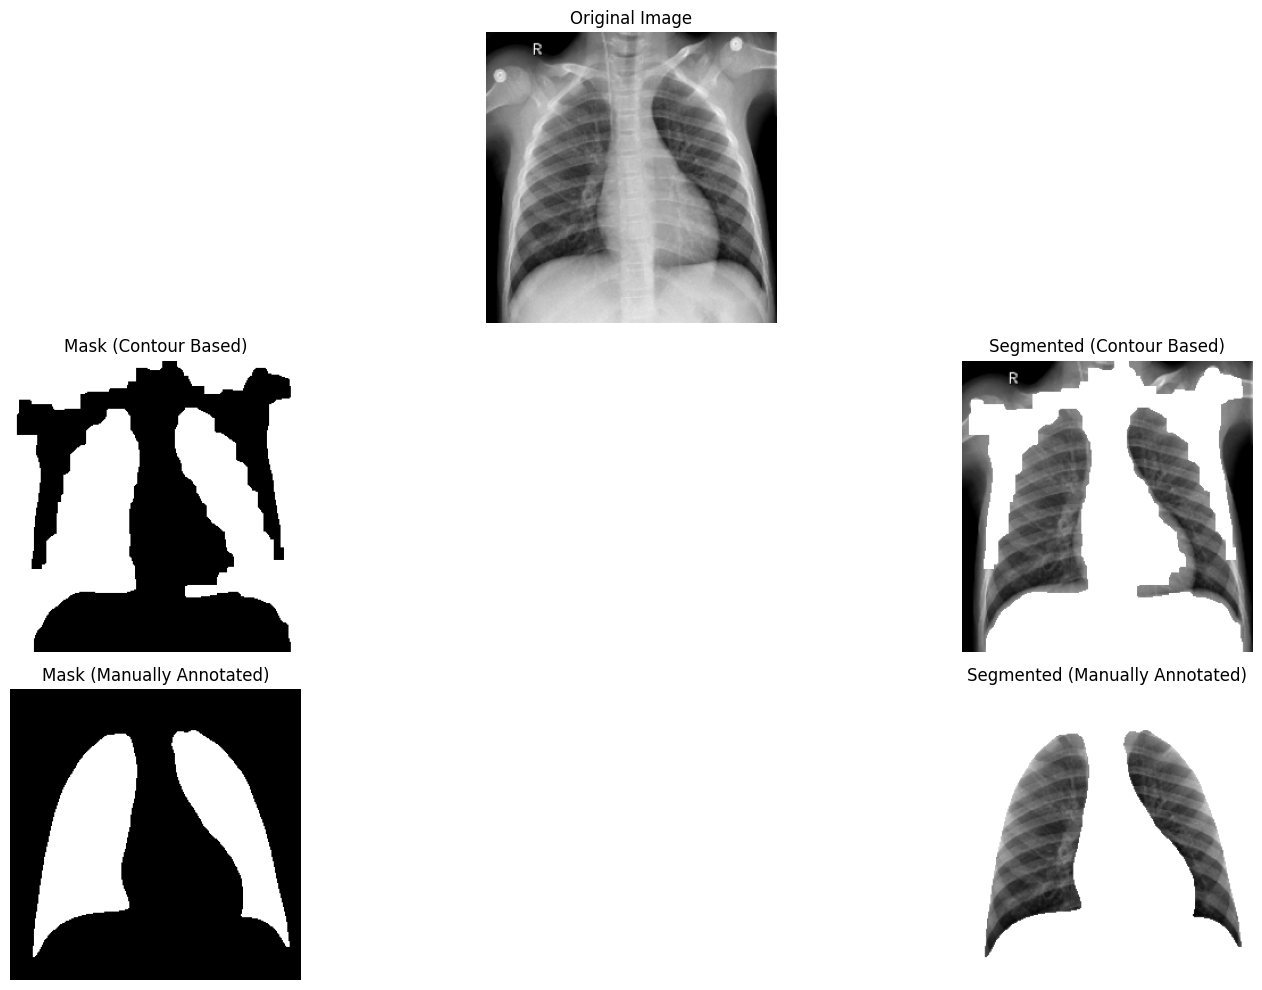

In [ ]:
original_path = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)'
mask_path1 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/masks_subset_2 (4000 version)'
mask_path2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_masks_subset_3 (4000 version)'
segmented_path1 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/segmented_images_subset (4000 version)'
segmented_path2 = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_segmented_images_subset (4000 version)'
classes = ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID']

# Helper function to find the corresponding mask or segmented image with any extension
def find_corresponding_file(folder_path, base_name):
    extensions = ['.jpg', '.jpeg', '.png']
    for ext in extensions:
        file_path = os.path.join(folder_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None  # Return None if no file is found

# Function to randomly select an image from the original path
def get_random_image_and_paths(original_path, mask_path1, mask_path2, segmented_path1, segmented_path2):
    # Randomly select a class
    class_name = random.choice(classes)

    # Paths for the selected class
    original_class_folder = os.path.join(original_path, class_name)
    mask_class_folder1 = os.path.join(mask_path1, class_name)
    mask_class_folder2 = os.path.join(mask_path2, class_name)
    segmented_class_folder1 = os.path.join(segmented_path1, class_name)
    segmented_class_folder2 = os.path.join(segmented_path2, class_name)

    # List all image files in the original class folder
    image_files = [img for img in os.listdir(original_class_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

    if len(image_files) == 0:
        print(f"No images found in {class_name} folder.")
        return None

    # Randomly select an image
    image_file = random.choice(image_files)

    # Get the base name without the extension
    image_name = os.path.splitext(image_file)[0]

    # Find corresponding mask and segmented images from both paths
    mask_image_path1 = find_corresponding_file(mask_class_folder1, f"{image_name}_mask")
    segmented_image_path1 = find_corresponding_file(segmented_class_folder1, f"{image_name}_segmented")
    mask_image_path2 = find_corresponding_file(mask_class_folder2, f"{image_name}_mask")
    segmented_image_path2 = find_corresponding_file(segmented_class_folder2, f"{image_name}_segmented")

    # Return paths for the original, mask, and segmented images
    return (os.path.join(original_class_folder, image_file),
            mask_image_path1, segmented_image_path1,
            mask_image_path2, segmented_image_path2)

# Function to display the images in a tree structure
def display_image_tree(original_image_path, mask_image_path1, segmented_image_path1, mask_image_path2, segmented_image_path2):
    plt.figure(figsize=(15, 10))

    # Load the original image
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    # Load images from the first branch (CONTOUR BASED SEGMENTATION WITH UNET)
    mask_image1 = cv2.imread(mask_image_path1, cv2.IMREAD_GRAYSCALE) if mask_image_path1 else None
    segmented_image1 = cv2.imread(segmented_image_path1, cv2.IMREAD_GRAYSCALE) if segmented_image_path1 else None

    # Load images from the second branch (MANUALLY ANNOTATED SEGMENTATION USING UNET)
    mask_image2 = cv2.imread(mask_image_path2, cv2.IMREAD_GRAYSCALE) if mask_image_path2 else None
    segmented_image2 = cv2.imread(segmented_image_path2, cv2.IMREAD_GRAYSCALE) if segmented_image_path2 else None

    # Display Original Image
    plt.subplot(3, 3, 2)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # First branch: Contour Based Segmentation with UNET
    plt.subplot(3, 3, 4)
    if mask_image1 is not None:
        plt.imshow(mask_image1, cmap='gray')
        plt.title('Mask (Contour Based)')
    else:
        plt.title('Mask (Contour Based) - Not Found')
    plt.axis('off')

    plt.subplot(3, 3, 6)
    if segmented_image1 is not None:
        plt.imshow(segmented_image1, cmap='gray')
        plt.title('Segmented (Contour Based)')
    else:
        plt.title('Segmented (Contour Based) - Not Found')
    plt.axis('off')

    # Second branch: Manually Annotated Segmentation Using UNET
    plt.subplot(3, 3, 7)
    if mask_image2 is not None:
        plt.imshow(mask_image2, cmap='gray')
        plt.title('Mask (Manually Annotated)')
    else:
        plt.title('Mask (Manually Annotated) - Not Found')
    plt.axis('off')

    plt.subplot(3, 3, 9)
    if segmented_image2 is not None:
        plt.imshow(segmented_image2, cmap='gray')
        plt.title('Segmented (Manually Annotated)')
    else:
        plt.title('Segmented (Manually Annotated) - Not Found')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get random image and corresponding masks/segmented images
random_image_paths = get_random_image_and_paths(original_path, mask_path1, mask_path2, segmented_path1, segmented_path2)

if random_image_paths:
    display_image_tree(*random_image_paths)
else:
    print("No valid images to display.")


# **Testing Images**

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Attempt to load the model as a ResNet50 (or try other common models like VGG, Inception, etc.)
def load_classification_model(model_path):
    try:
        # Initialize a standard ResNet50 architecture
        model = models.resnet50(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = torch.nn.Linear(num_ftrs, 4)  # Assuming 4 classes

        # Load the state dictionary
        state_dict = torch.load(model_path, map_location=torch.device('cpu'))
        model.load_state_dict(state_dict)

        model.eval()  # Set to evaluation mode
        return model
    except Exception as e:
        print("Error loading model. The architecture might be different:", e)
        return None

# Preprocess the image for model input
def preprocess_image(image_path):
    input_image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # Adjust size as per model requirements
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)  # Add batch dimension
    return input_tensor

# Perform classification and print result
def classify_image(model, input_tensor):
    if model is None:
        print("Model could not be loaded due to architecture mismatch.")
        return
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = probabilities.argmax().item()
        predicted_probability = probabilities[predicted_class].item()

        # Assuming class labels; adjust as needed
        class_labels = ["COVID", "NORMAL", "PNEUMONIA", "TUBERCULOSIS"]

        print(f"Predicted Class: {class_labels[predicted_class]}, Probability: {predicted_probability:.2f}")

# Example usage
classification_model_path = '/content/drive/MyDrive/Model Paths/ensemble_model_checkpoint.pth'
uploaded_image_path = '/content/drive/MyDrive/Dataset/Original Dataset (Split)/test/NORMAL/NORMAL (1028).png'

# Load model and classify
classification_model = load_classification_model(classification_model_path)
input_image_tensor = preprocess_image(uploaded_image_path)
classify_image(classification_model, input_image_tensor)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-11-7d13f53151af>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

Error loading model. The architecture might be different: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.ru

In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# For inline display of images
%matplotlib inline

# -----------------------------
# Define folder paths
# -----------------------------
# Original images folder (using class NORMAL)
original_folder = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/images_subset (4000 version)/NORMAL'

# Threshold-based segmentation masks folder (mask file name same as original)
threshold_mask_folder = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/masks_subset_1/NORMAL'

# Contour-based segmentation masks folder (mask file name is original_name + "_mask.png")
contour_mask_folder = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/masks_subset_2 (4000 version)/NORMAL'

# Semi-supervised segmentation masks folder (mask file name is original_name + "_mask.png")
semisup_mask_folder = '/content/drive/MyDrive/Dataset/Subset Images for Segmentation/4000 Images Segmentation (Non-split version)/new_manual_masks_subset_3 (4000 version)/NORMAL'

# -----------------------------
# Choose a random sample from the original folder
# -----------------------------
image_files = [f for f in os.listdir(original_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise Exception("No images found in the original folder.")
random_image_file = random.choice(image_files)
print("Randomly selected image:", random_image_file)

# Load the original image in grayscale
original_image_path = os.path.join(original_folder, random_image_file)
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    raise Exception(f"Failed to load original image: {original_image_path}")

# -----------------------------
# Prepare segmentation methods info
# -----------------------------
# For threshold method, the mask file name is the same as the original.
# For contour and semi-supervised methods, the mask file name is the original name with '_mask' appended before the extension.
segmentation_methods = {
    "Threshold": {
        "mask_folder": threshold_mask_folder,
        "mask_filename": random_image_file  # same name as original
    },
    "Contour": {
        "mask_folder": contour_mask_folder,
        "mask_filename": os.path.splitext(random_image_file)[0] + "_mask.png"
    },
    "Semi-supervised": {
        "mask_folder": semisup_mask_folder,
        "mask_filename": os.path.splitext(random_image_file)[0] + "_mask.png"
    }
}

# Dictionary to store the masks and segmented images
results = {}

# -----------------------------
# Process each segmentation method
# -----------------------------
for method, info in segmentation_methods.items():
    mask_path = os.path.join(info["mask_folder"], info["mask_filename"])
    if not os.path.exists(mask_path):
        print(f"Mask for method '{method}' not found at: {mask_path}")
        continue  # Skip if mask not found

    # Load mask in grayscale
    mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask_image is None:
        print(f"Failed to load mask for '{method}' from: {mask_path}")
        continue

    # Resize mask if its dimensions do not match the original image
    if mask_image.shape != original_image.shape:
        mask_image = cv2.resize(mask_image, (original_image.shape[1], original_image.shape[0]))

    # Create binary mask: assume mask areas are nonzero
    binary_mask = mask_image > 0

    # Apply the mask on the original image: keep original where mask is True, otherwise set background to white (255)
    segmented_image = np.where(binary_mask, original_image, 255)

    # Store the mask and segmented image in the results dictionary
    results[method] = {
        "mask": mask_image,
        "segmented": segmented_image
    }

# -----------------------------
# Display results in a 3x3 table (rows: segmentation methods, columns: Original, Mask, Segmented)
# -----------------------------
num_methods = len(results)
if num_methods == 0:
    print("No segmentation results available to display.")
else:
    # Create subplots: one row per segmentation method, 3 columns for Original, Mask, Segmented
    fig, axes = plt.subplots(num_methods, 3, figsize=(15, 5 * num_methods))

    # If there's only one row, make sure axes is 2D for consistency
    if num_methods == 1:
        axes = np.expand_dims(axes, axis=0)

    row_index = 0
    for method, data in results.items():
        # Column 1: Original image (same for all methods)
        axes[row_index, 0].imshow(original_image, cmap='gray')
        axes[row_index, 0].set_title(f"{method} - Original")
        axes[row_index, 0].axis("off")

        # Column 2: Corresponding mask
        axes[row_index, 1].imshow(data["mask"], cmap='gray')
        axes[row_index, 1].set_title(f"{method} - Mask")
        axes[row_index, 1].axis("off")

        # Column 3: Segmented image
        axes[row_index, 2].imshow(data["segmented"], cmap='gray')
        axes[row_index, 2].set_title(f"{method} - Segmented")
        axes[row_index, 2].axis("off")

        row_index += 1

    plt.tight_layout()
    plt.show()

print("Segmentation and display process completed.")

Randomly selected image: NORMAL (3271).png
Mask for method 'Threshold' not found at: /content/drive/MyDrive/Dataset/Subset Images for Segmentation/masks_subset_1/NORMAL/NORMAL (3271).png
